In [2]:
import warnings
import numpy as np
import pandas as pd 
import klib as kb
import seaborn as sns
import matplotlib.pyplot as plt

from scripts.wrapped import Wrapped

In [3]:
warnings.filterwarnings("ignore")

wp = Wrapped(
    '../data/row/',
    '../data/processed/',
    '../data/files/'
)

# Preparando os nosso dados

In [5]:
files = ['df.openmic_00_40', 'df.openmic_41_80', 
         'df.openmic_81_100', 'df.openmic_101_110',
         'df.openmic_111_120', 'df.openmic_121_130', 
         'df.openmic_131_140', 'df.openmic_141_155']

- Mesclar dataframes  

In [6]:
dfs = [wp.load_data(file) for file in files]

df_openmic = pd.concat([dfs[0], dfs[1], dfs[2], dfs[3], dfs[4], dfs[5], dfs[6], dfs[7]])

df_openmic

instrumento          file_name   chroma1   chroma2  \
0         clarinet,flute,trumpet    000046_3840.ogg  0.610052  0.200399   
1        saxophone,trumpet,voice  000135_483840.ogg  0.131446  0.223305   
2                      accordion  000139_119040.ogg  0.513887  0.581963   
3             accordion,clarinet  000141_153600.ogg  0.085421  0.057248   
4              accordion,ukulele   000144_30720.ogg  0.207143  0.302477   
...                          ...                ...       ...       ...   
1851  banjo,drums,ukulele,violin  155294_184320.ogg  0.514580  0.146882   
1852    mallet_percussion,violin   155295_76800.ogg  0.870850  0.689791   
1853          saxophone,trombone  155307_211200.ogg  0.292233  0.399783   
1854                   saxophone  155310_372480.ogg  0.385145  0.461685   
1855  saxophone,trombone,trumpet  155311_453120.ogg  0.412230  0.246903   

       chroma3   chroma4   chroma5   chroma6   chroma7   chroma8  ...  \
0     0.091883  0.106613  0.318967  0.370384  0.212237  0.403297  ...   
1     0.348276  0.271956  0.410299  0.424968  0.462091  0.548381  ...   
2     0.434641  0.293949  0.317826  0.271148  0.548258  0.660767  ...   
3     0.127290  0.052398  0.223720  0.839838  0.224974  0.074605  ...   
4     0.419242  0.419936  0.385933  0.393868  0.514679  0.485563  ...   
...        ...       ...       ...       ...       ...       ...  ...   
1851  0.264446  0.086197  0.211541  0.199623  0.081870  0.262383  ...   
1852  0.582143  0.443754  0.286612  0.248202  0.241691  0.549434  ...   
1853  0.479268  0.710289  0.653324  0.346229  0.391732  0.309288  ...   
1854  0.506615  0.418816  0.609257  0.383976  0.404393  0.550216  ...   
1855  0.348350  0.474904  0.568873  0.236333  0.371610  0.457601  ...   

         mfcc10     mfcc11     mfcc12    mfcc13     mfcc14     mfcc15  \
0      7.107868   5.499816  -2.228993 -0.737109  -2.127543  -3.176607   
1     -3.621057  -1.414497  -6.562031 -2.020283  -5.778323   0.375941   
2     -5.140857  10.352439  -1.830431  0.709631  -1.533663   3.445959   
3    -11.350122   1.457808 -14.018645 -2.928224  -3.525484  10.752768   
4      1.873171   1.032812 -10.872755 -2.161526  -5.126678   2.240242   
...         ...        ...        ...       ...        ...        ...   
1851 -27.127117  -5.330838  -1.223038 -4.907955  -9.676023  -6.479323   
1852   1.059998   2.564353   4.533062  9.417893   7.453518   6.479380   
1853   7.729214  12.063098   1.978559  4.583903  -6.567879   1.333806   
1854   3.085770  -8.483650  -9.868202 -6.603438 -13.704004   5.373063   
1855  -4.700380   3.060819  -5.265926  1.240435  -6.365675  -0.074084   

        mfcc16    mfcc17    mfcc18     mfcc19  
0    -8.084955 -9.682590 -4.147902   9.008560  
1    -5.407960  4.504435  2.830012   8.030535  
2     1.397324  7.555676  1.468902  10.498053  
3    -3.239589 -4.398735 -7.000278   2.407068  
4    -5.458359  3.909818 -0.999526   0.111455  
...        ...       ...       ...        ...  
1851 -7.836796  0.828719 -4.341487   3.506028  
1852  5.128366  2.850986  9.074769  17.078918  
1853 -5.221951  1.111744 -2.953671   2.559783  
1854 -9.014189 -3.381693 -6.478329  -4.548353  
1855 -7.268025  1.277857 -3.456044   6.332309  

[20000 rows x 53 columns]

In [7]:
df_openmic.columns

Index(['instrumento', 'file_name', 'chroma1', 'chroma2', 'chroma3', 'chroma4',
       'chroma5', 'chroma6', 'chroma7', 'chroma8', 'chroma9', 'chroma10',
       'chroma11', 'chroma12', 'mel_spectogram', 'spectogram',
       'spectral_band2', 'spectral_band3', 'spectral_band4',
       'spectral_centroid', 'spectral_onset', 'spectral_rolloff', 'harmonics',
       'perceptual', 'tempo_bpm', 'zero_crossing_rate', 'zero_crossing',
       'tonnetz0', 'tonnetz1', 'tonnetz2', 'tonnetz3', 'tonnetz4', 'tonnetz5',
       'mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7',
       'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14',
       'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19'],
      dtype='object')

- Verificar os instrumentos em nossa base de dados

In [7]:
count = 0
for inst in sorted( df_openmic['instrumento'].unique() ) :
  print( count, inst , len( df_openmic['instrumento'].unique() ))
  count += 1

0 accordion 2755
1 accordion,banjo 2755
2 accordion,banjo,bass 2755
3 accordion,banjo,bass,cello 2755
4 accordion,banjo,bass,clarinet 2755
5 accordion,banjo,bass,clarinet,flute 2755
6 accordion,banjo,bass,cymbals,flute 2755
7 accordion,banjo,bass,mandolin 2755
8 accordion,banjo,bass,mandolin,trombone,trumpet,ukulele 2755
9 accordion,banjo,bass,violin 2755
10 accordion,banjo,cello 2755
11 accordion,banjo,cello,clarinet,trombone,trumpet 2755
12 accordion,banjo,cello,drums 2755
13 accordion,banjo,clarinet 2755
14 accordion,banjo,clarinet,cymbals 2755
15 accordion,banjo,clarinet,drums 2755
16 accordion,banjo,clarinet,flute 2755
17 accordion,banjo,clarinet,flute,mandolin 2755
18 accordion,banjo,clarinet,mandolin,trombone,trumpet,ukulele 2755
19 accordion,banjo,clarinet,mandolin,trombone,ukulele 2755
20 accordion,banjo,clarinet,mandolin,ukulele 2755
21 accordion,banjo,clarinet,saxophone,trombone,trumpet 2755
22 accordion,banjo,clarinet,synthesizer 2755
23 accordion,banjo,clarinet,trombone,tr

- verificar dataframe com as labels de cada instrumento

In [8]:
labels = pd.read_csv('../data/row/openmic-2018-aggregated-labels.csv')

size = len(labels['instrument'].unique())
labels_unique = labels['instrument'].unique()

print(f'{labels_unique} - {size}')

labels

['clarinet' 'flute' 'trumpet' 'saxophone' 'voice' 'accordion' 'ukulele'
 'mallet_percussion' 'piano' 'guitar' 'mandolin' 'banjo' 'synthesizer'
 'trombone' 'organ' 'drums' 'bass' 'cymbals' 'cello' 'violin'] - 20


sample_key instrument  relevance  num_responses
0        000046_3840   clarinet    0.17105              3
1        000046_3840      flute    0.00000              3
2        000046_3840    trumpet    0.00000              3
3      000135_483840  saxophone    0.14705              3
4      000135_483840      voice    1.00000              3
...              ...        ...        ...            ...
41529  155307_211200  saxophone    1.00000              3
41530  155310_372480  saxophone    1.00000              3
41531  155311_453120  saxophone    1.00000              3
41532  155311_453120    trumpet    0.82605              3
41533  155311_453120   trombone    1.00000              3

[41534 rows x 4 columns]

- Exemplo de indentificar instrumento individual de uma faixa

In [9]:
aux_row = labels.loc[labels['sample_key'] == '004236_80640']
instr = aux_row['instrument'].tolist()

instrs = ','.join(sorted(instr))
print(sorted(set(instr)), type(sorted(set(instr))))
print(sorted( instr ), type(sorted(instr)))
print('\n', sorted(set(instr)))
aux_row

['accordion', 'banjo', 'mandolin'] <class 'list'>
['accordion', 'accordion', 'accordion', 'banjo', 'mandolin'] <class 'list'>

 ['accordion', 'banjo', 'mandolin']


sample_key instrument  relevance  num_responses
968  004236_80640  accordion    0.81060            177
969  004236_80640  accordion    0.84375              3
970  004236_80640      banjo    0.00000              3
971  004236_80640  accordion    0.76995            571
972  004236_80640   mandolin    0.00000              3

- Base de instrumentos Isolados

In [10]:
frames = []
for lb in sorted(labels['instrument'].unique()):
  print(lb)
  df_aux = df_openmic.loc[df_openmic['instrumento'] == lb]

  print(lb, df_aux.shape)
  frames.append(df_aux)

df_instrumentos = pd.concat(frames, ignore_index = True)

# salvar o nosso dataframe de instrumentos isolados
wp.save_data('df_instrumentos', df_instrumentos)

df_instrumentos  

accordion
accordion (511, 53)
banjo
banjo (375, 53)
bass
bass (508, 53)
cello
cello (481, 53)
clarinet
clarinet (152, 53)
cymbals
cymbals (503, 53)
drums
drums (336, 53)
flute
flute (654, 53)
guitar
guitar (347, 53)
mallet_percussion
mallet_percussion (719, 53)
mandolin
mandolin (163, 53)
organ
organ (611, 53)
piano
piano (628, 53)
saxophone
saxophone (539, 53)
synthesizer
synthesizer (375, 53)
trombone
trombone (196, 53)
trumpet
trumpet (68, 53)
ukulele
ukulele (389, 53)
violin
violin (469, 53)
voice
voice (452, 53)


instrumento          file_name   chroma1   chroma2   chroma3   chroma4  \
0      accordion  000139_119040.ogg  0.513887  0.581963  0.434641  0.293949   
1      accordion  000145_172800.ogg  0.175587  0.429345  0.840043  0.384524   
2      accordion  000201_168960.ogg  0.453814  0.219808  0.228484  0.446050   
3      accordion  000212_211200.ogg  0.209729  0.338755  0.660264  0.256625   
4      accordion   000640_49920.ogg  0.484400  0.334572  0.441629  0.679485   
...          ...                ...       ...       ...       ...       ...   
8471       voice  153341_184320.ogg  0.332754  0.359639  0.473210  0.512169   
8472       voice  153412_134400.ogg  0.161793  0.190661  0.249882  0.378161   
8473       voice   153478_30720.ogg  0.589552  0.309548  0.187583  0.169132   
8474       voice  153986_203520.ogg  0.615495  0.541314  0.467334  0.611199   
8475       voice  154172_299520.ogg  0.521300  0.480413  0.476578  0.401069   

       chroma5   chroma6   chroma7   chroma8  ...     mfcc10     mfcc11  \
0     0.317826  0.271148  0.548258  0.660767  ...  -5.140857  10.352439   
1     0.282545  0.346341  0.482365  0.321750  ...  -1.211487   9.595064   
2     0.178916  0.250981  0.327460  0.333150  ... -16.190577   1.937491   
3     0.275209  0.180417  0.399448  0.381560  ...  -0.523156   1.412061   
4     0.382958  0.326033  0.205775  0.309727  ...  -8.647794   3.284153   
...        ...       ...       ...       ...  ...        ...        ...   
8471  0.607755  0.500391  0.378782  0.420053  ...  -4.875653   2.704151   
8472  0.461520  0.332309  0.294171  0.251455  ...  -1.182519  -3.178636   
8473  0.240637  0.332375  0.333517  0.585136  ... -16.827093   0.815251   
8474  0.791296  0.678383  0.508162  0.543337  ...   0.068194   4.746015   
8475  0.410142  0.557736  0.489720  0.556477  ...   0.731709   4.723079   

         mfcc12     mfcc13     mfcc14     mfcc15    mfcc16    mfcc17  \
0     -1.830431   0.709631  -1.533663   3.445959  1.397324  7.555676   
1     -0.532024   9.224909  -1.727268   0.398663 -5.348599  5.749533   
2     -9.938826  -7.672649 -12.759929  -9.303410 -9.951704  0.198734   
3     -3.391795   1.884947  -4.441119   6.623763  2.606730  7.237651   
4      5.265181  10.642460   3.046261  -3.864471 -9.482952 -0.787216   
...         ...        ...        ...        ...       ...       ...   
8471  -4.521690   1.879251  -6.319352   1.512789 -7.151809 -1.834733   
8472 -11.015512  -7.479657  -9.194380  -4.153149 -8.789742  4.701506   
8473 -10.296307  -8.400555 -11.928357 -14.542219 -5.466450 -4.281743   
8474  -2.617890   2.208030  -0.682007   2.619602 -1.200114  5.823110   
8475 -10.582443   1.956028  -5.492694  -2.103657 -0.819125  2.082294   

        mfcc18     mfcc19  
0     1.468902  10.498053  
1    -2.110756  -3.542143  
2    -4.846475   7.278521  
3     0.069198   1.122705  
4    -1.997669  -0.640013  
...        ...        ...  
8471 -7.714043  -2.913627  
8472  4.045784   6.724212  
8473 -7.056125   6.623515  
8474  2.130090   8.821922  
8475 -7.077897   7.445070  

[8476 rows x 53 columns]

# Analise Exploratoria 

## Visão geral da distribuição de features por instrumento

- Todos os instrumentos

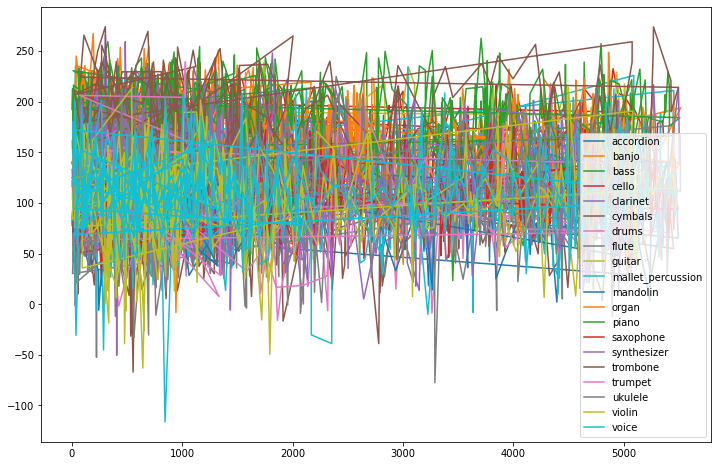

In [11]:
plt.figure(figsize=(12, 8))

for lb in sorted(labels['instrument'].unique()):
  df_aux = df_openmic.loc[df_openmic['instrumento'] == lb]
  df_aux['mfcc1'].plot(label = lb)
  
plt.legend()
plt.show()  

- Para um instrumento

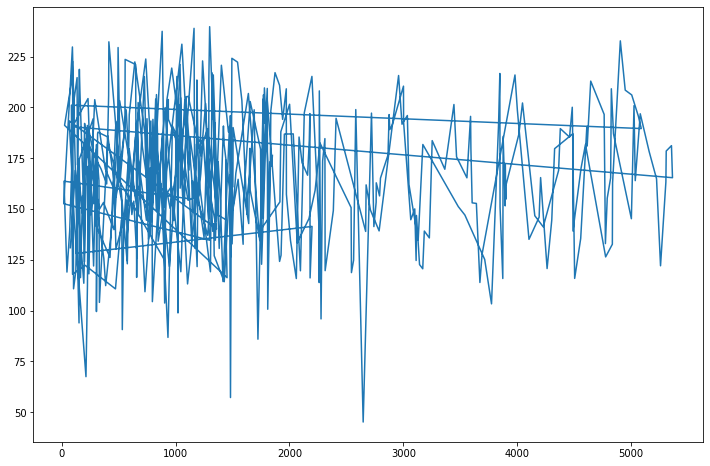

In [12]:
plt.figure(figsize=(12, 8))

instrument = 'cello'

df_aux = df_openmic.loc[df_openmic['instrumento'] == instrument]
df_aux['mfcc1'].plot(label = instrument)

plt.show() 

## BOXPLOT

- Tonnetz

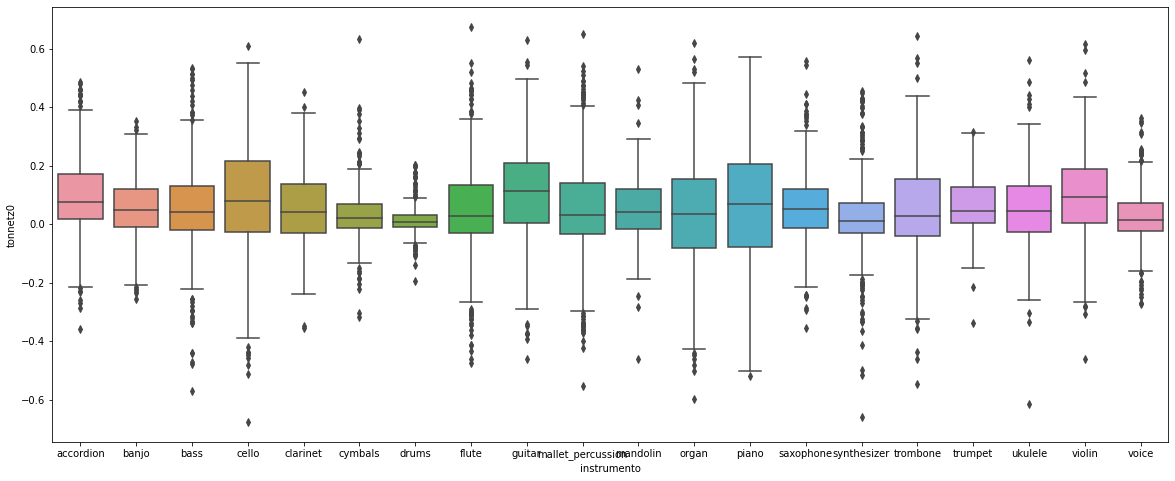

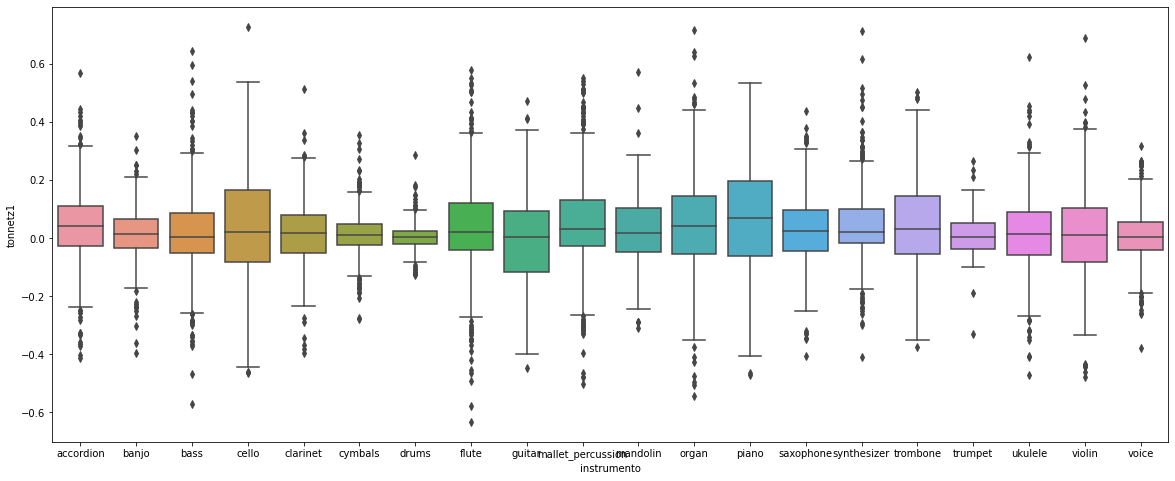

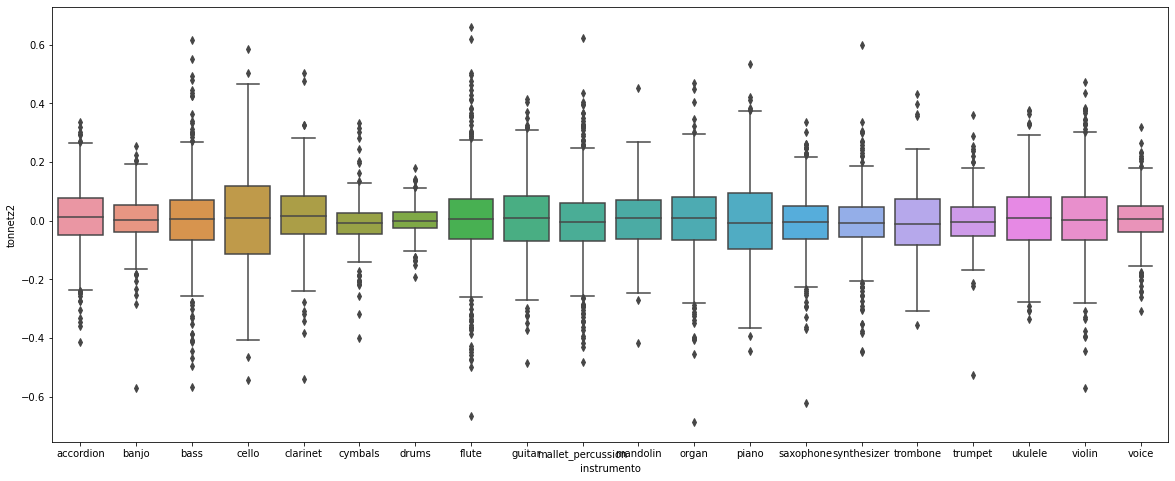

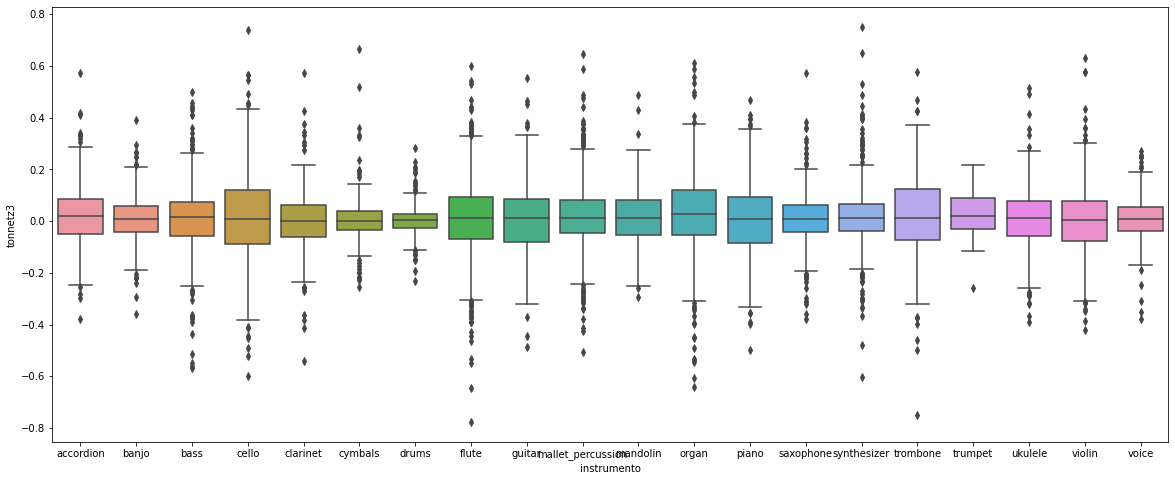

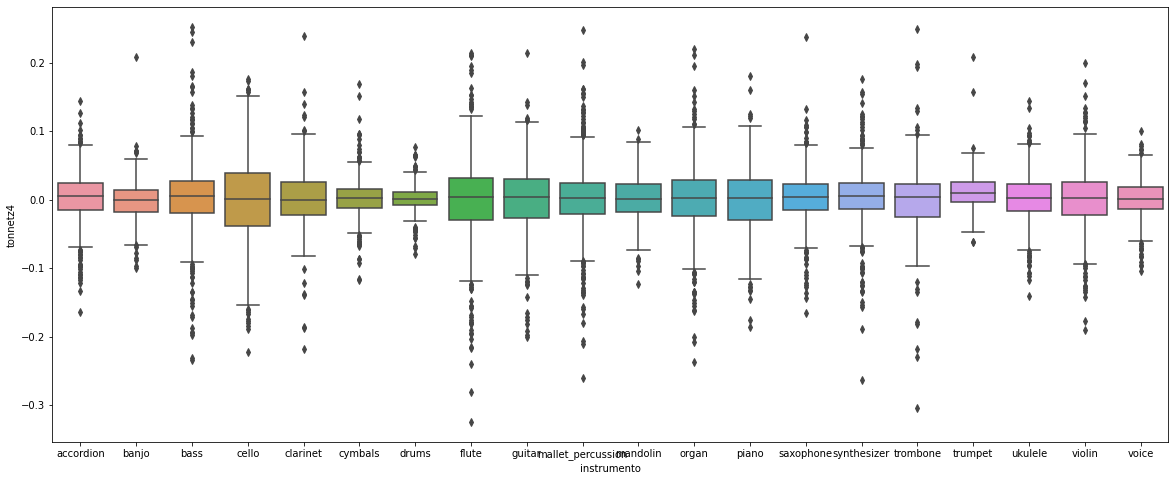

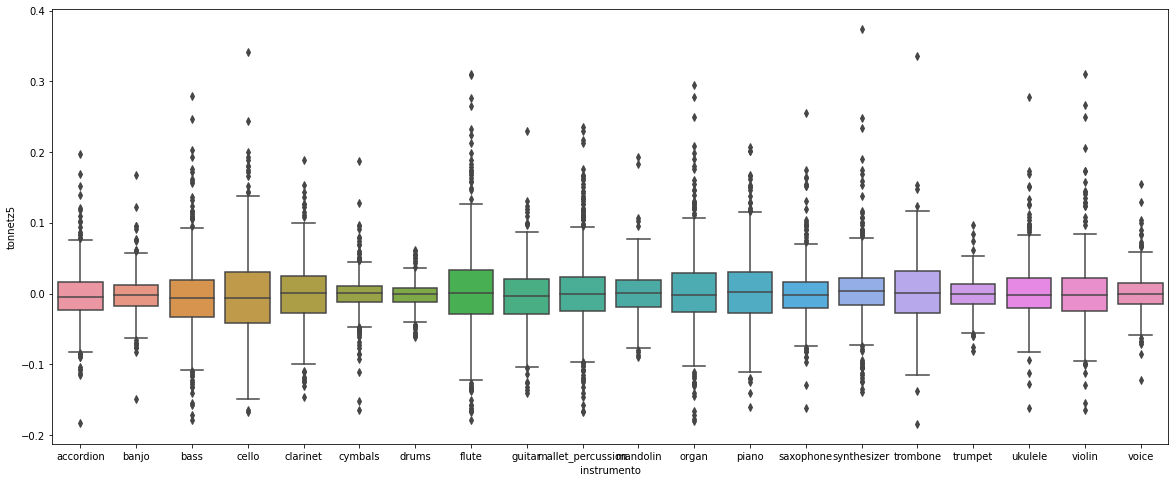

In [13]:
for i in range(6):    
    plt.figure(figsize=( 20, 8 ))
    ax = sns.boxplot(x="instrumento", y=f'tonnetz{i}', data=df_instrumentos)
    plt.show()

- mfcc

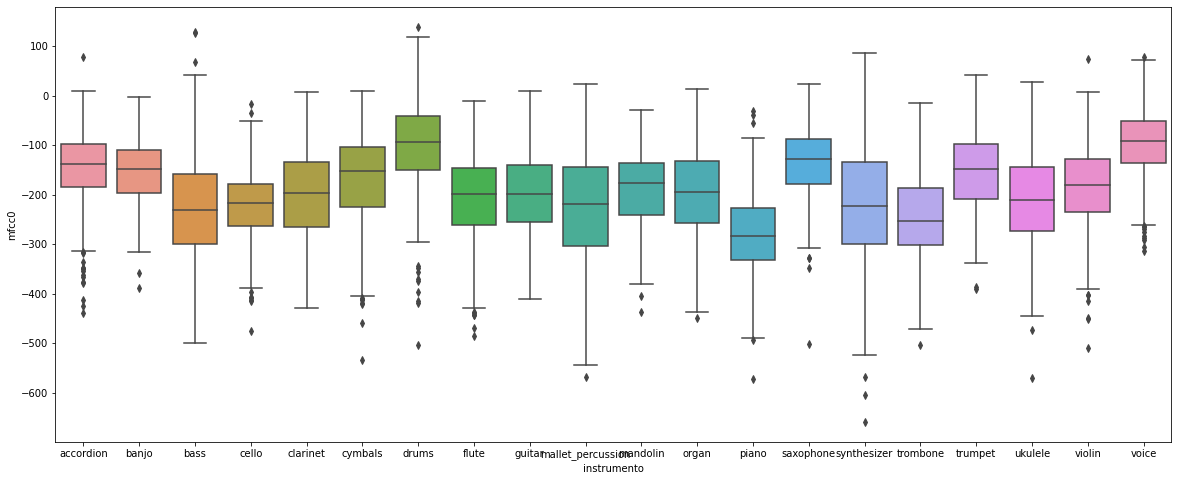

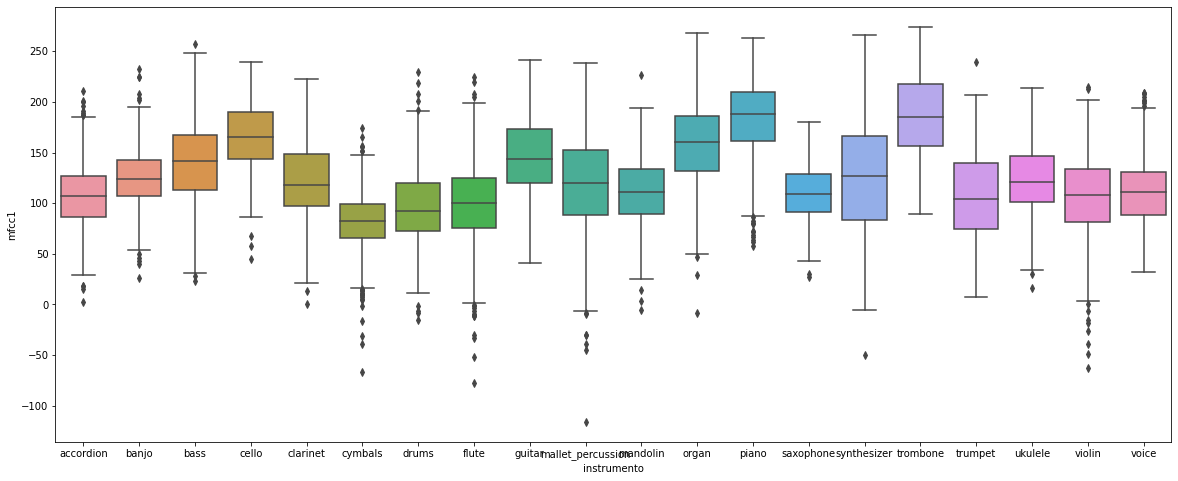

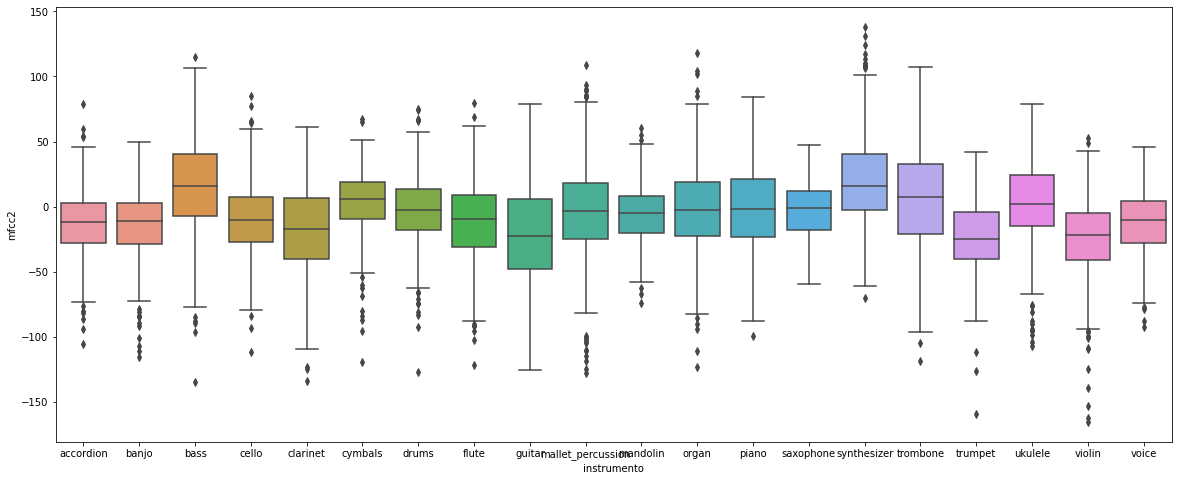

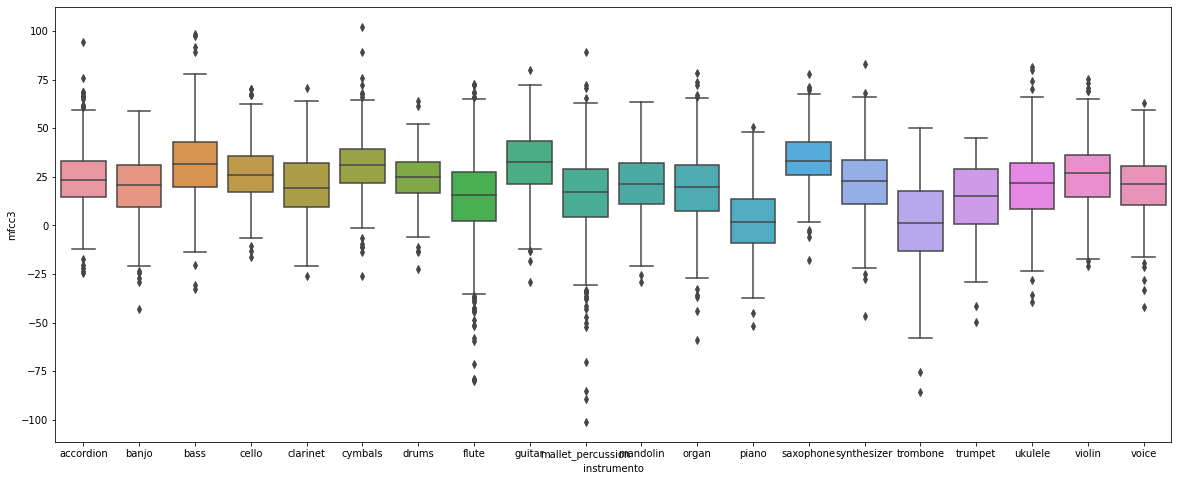

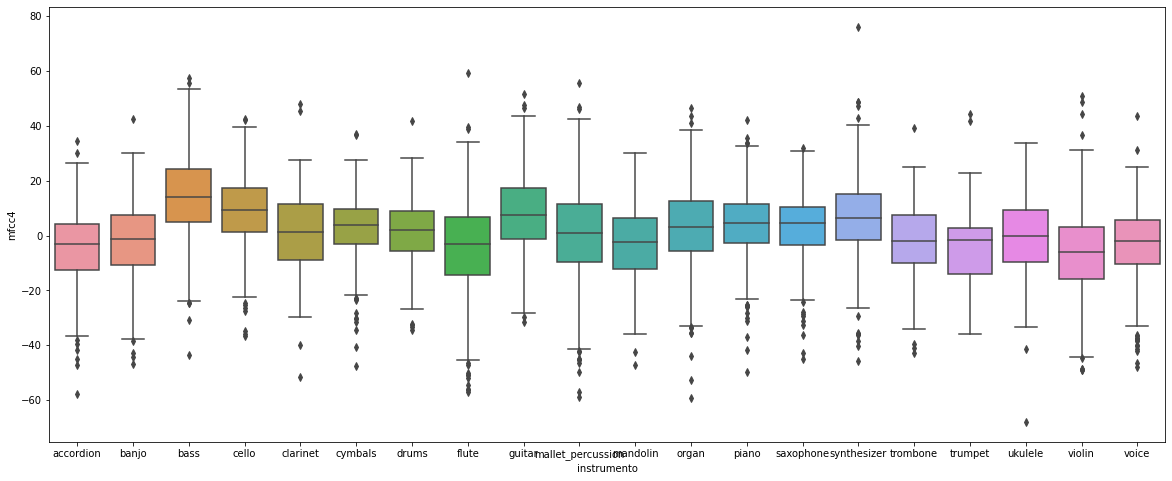

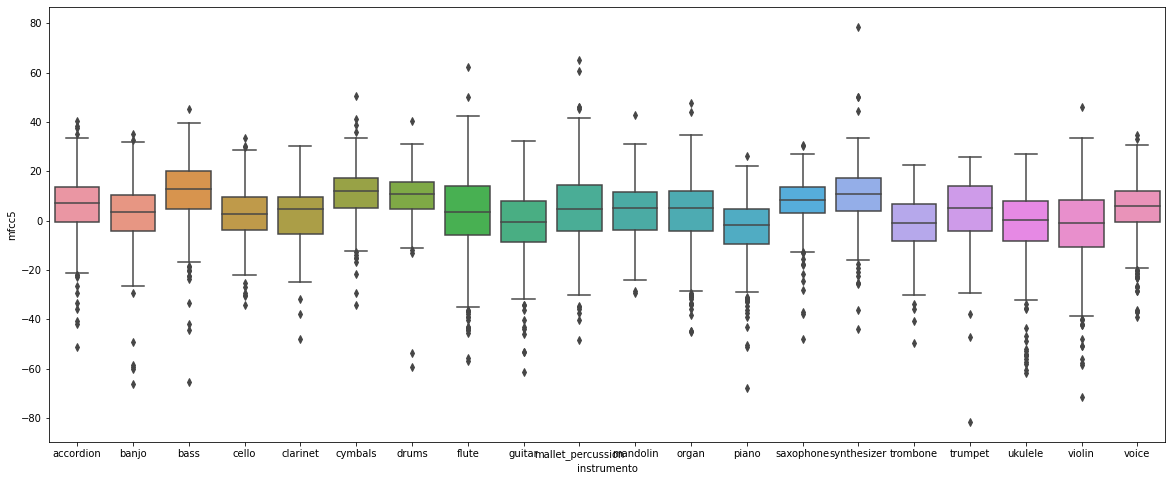

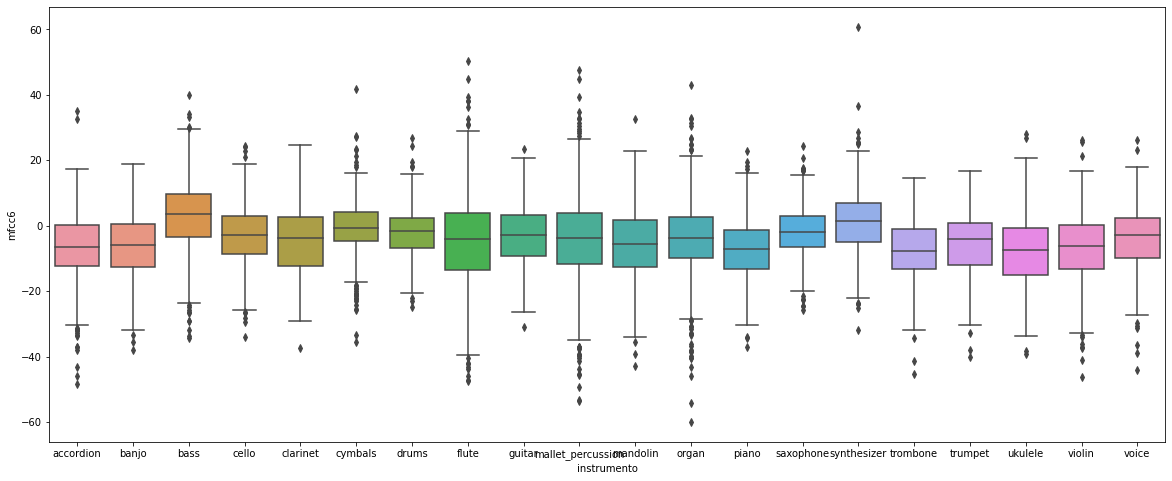

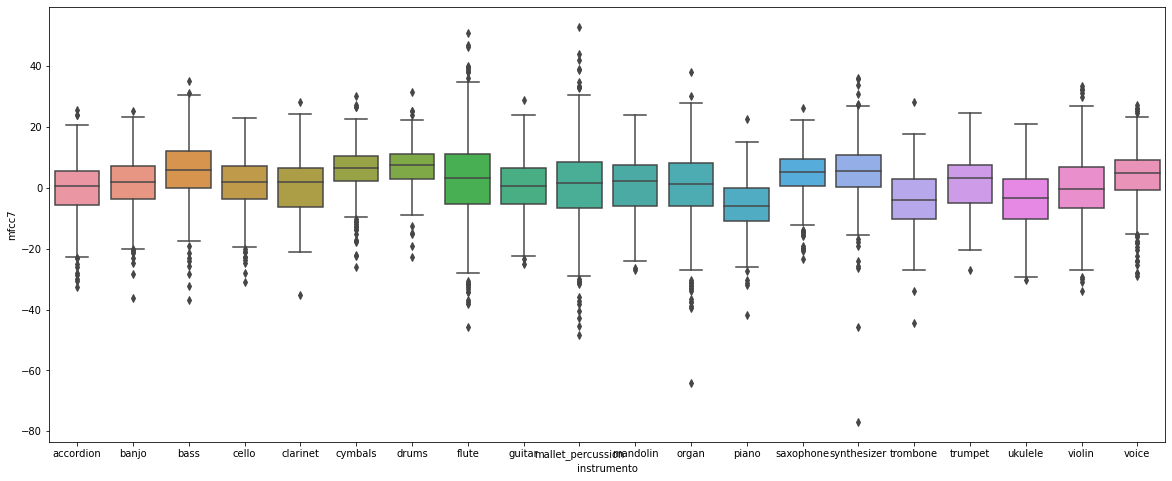

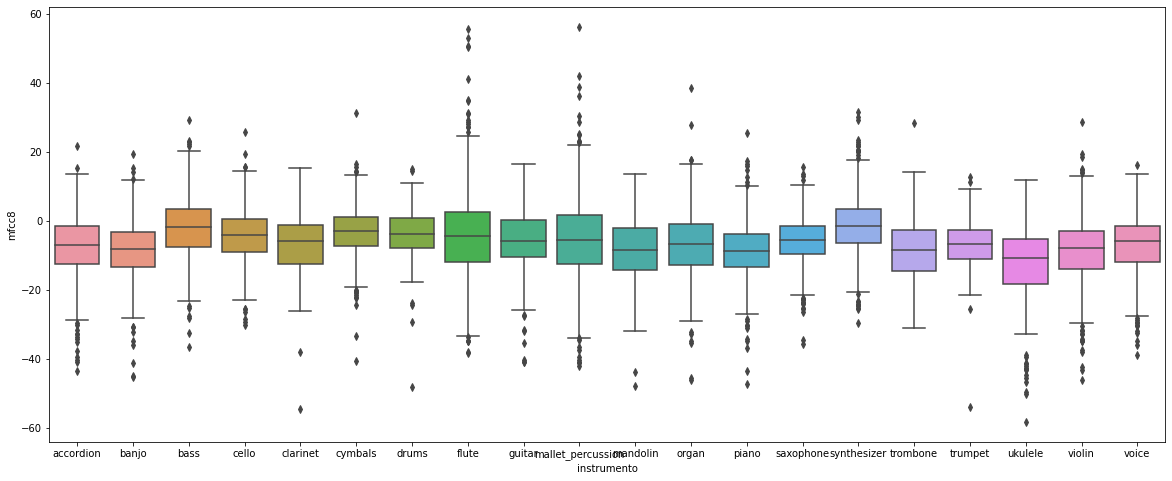

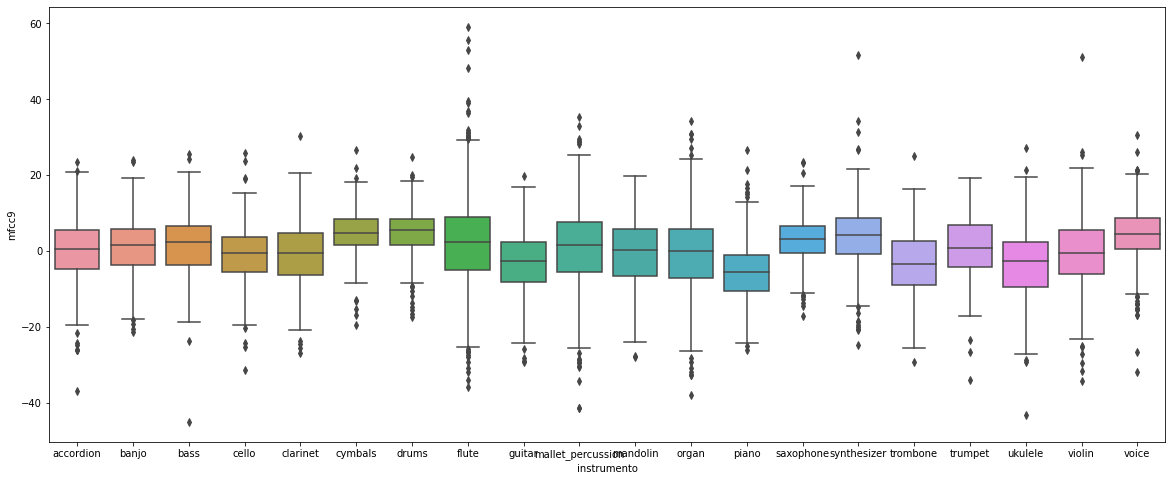

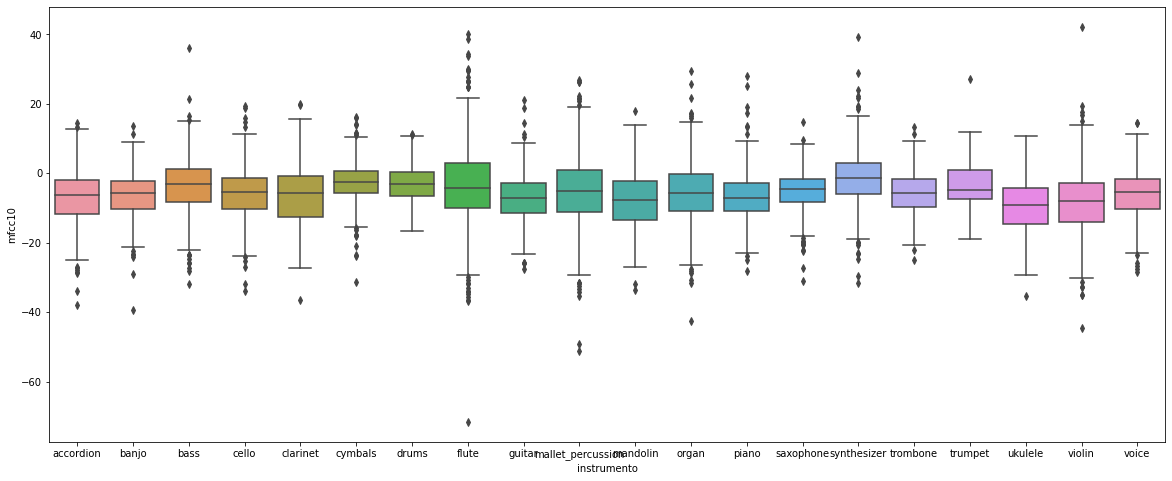

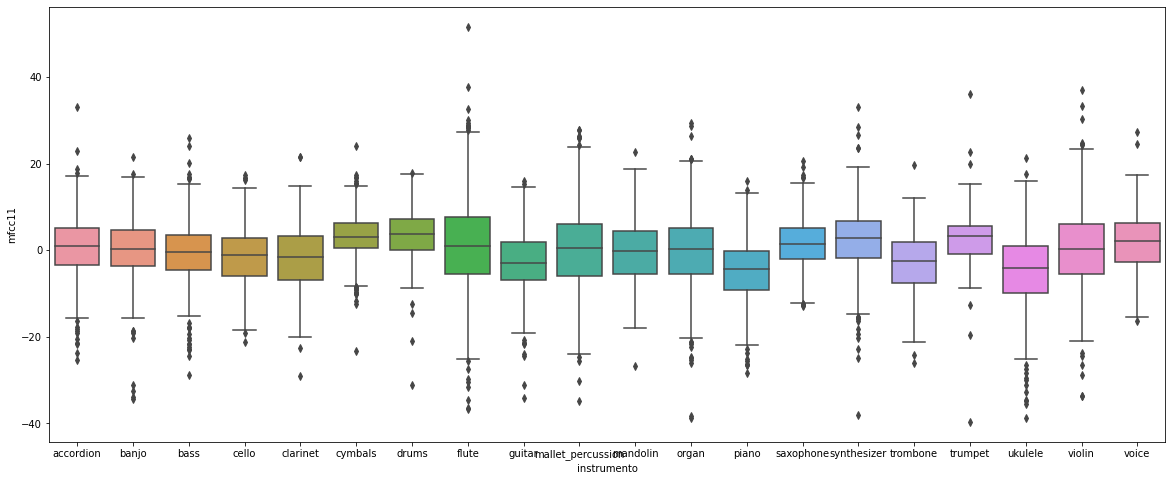

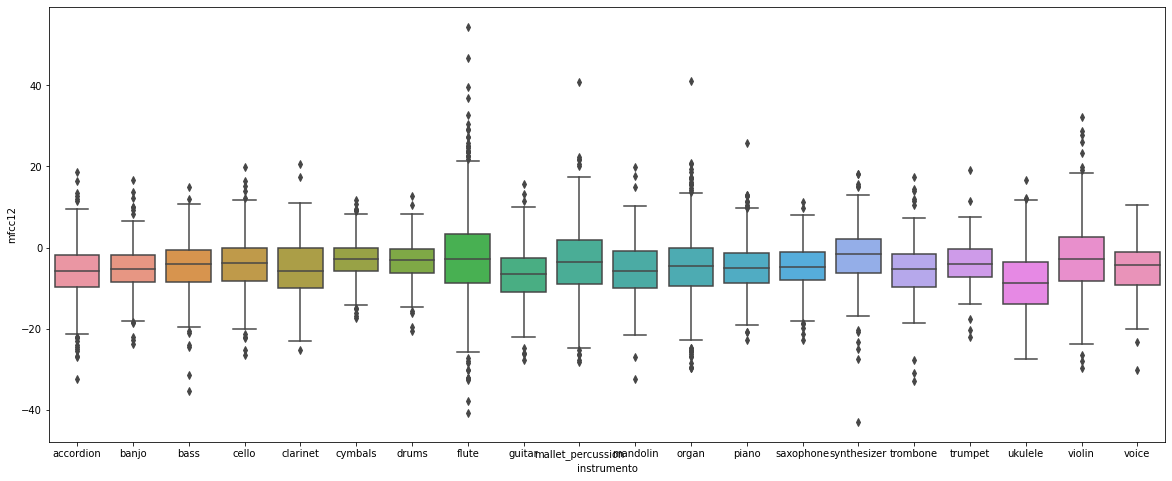

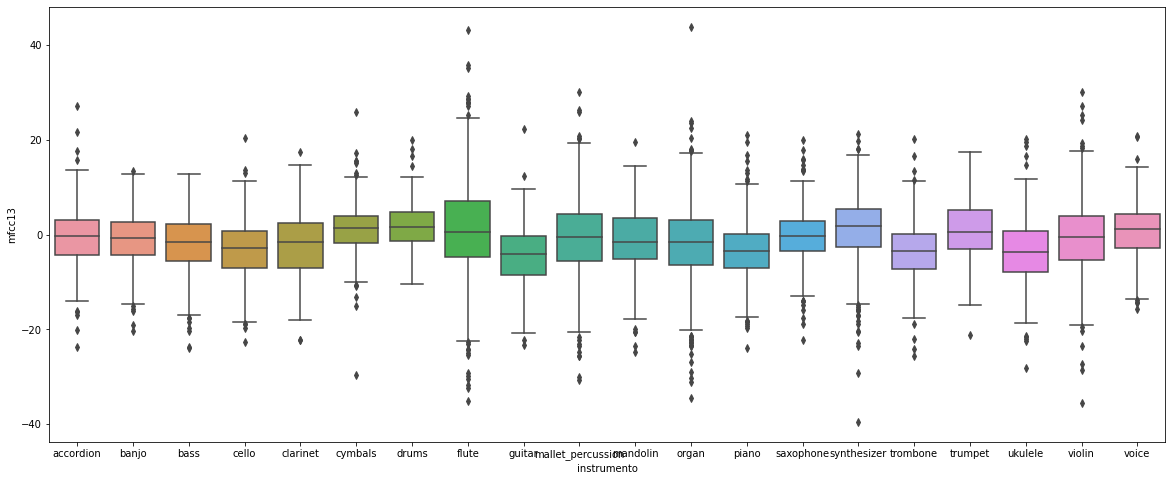

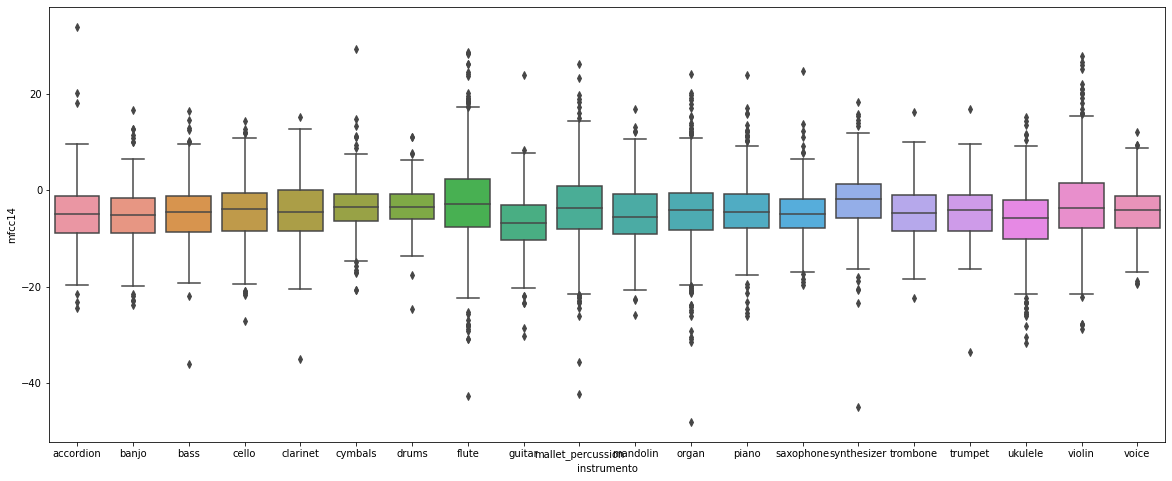

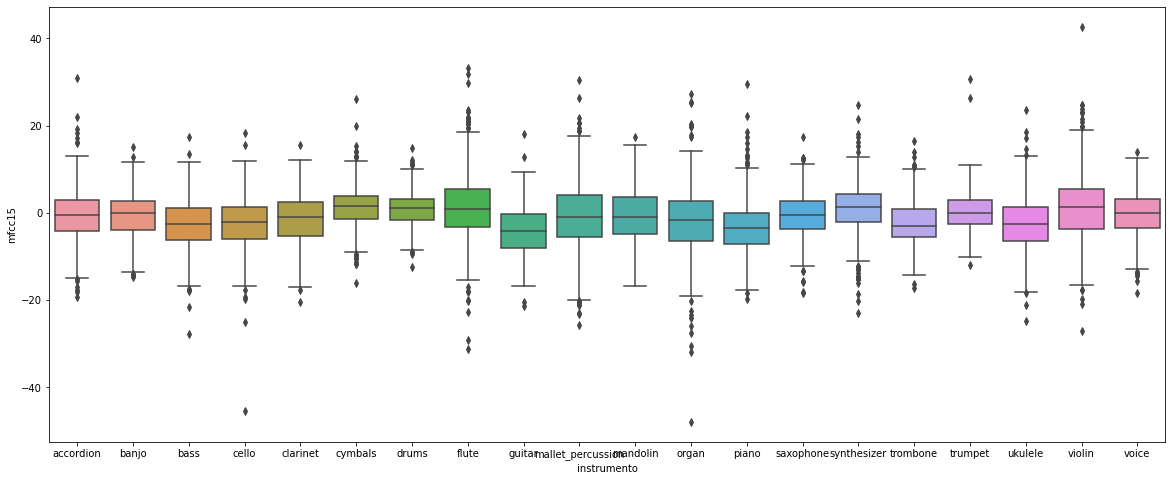

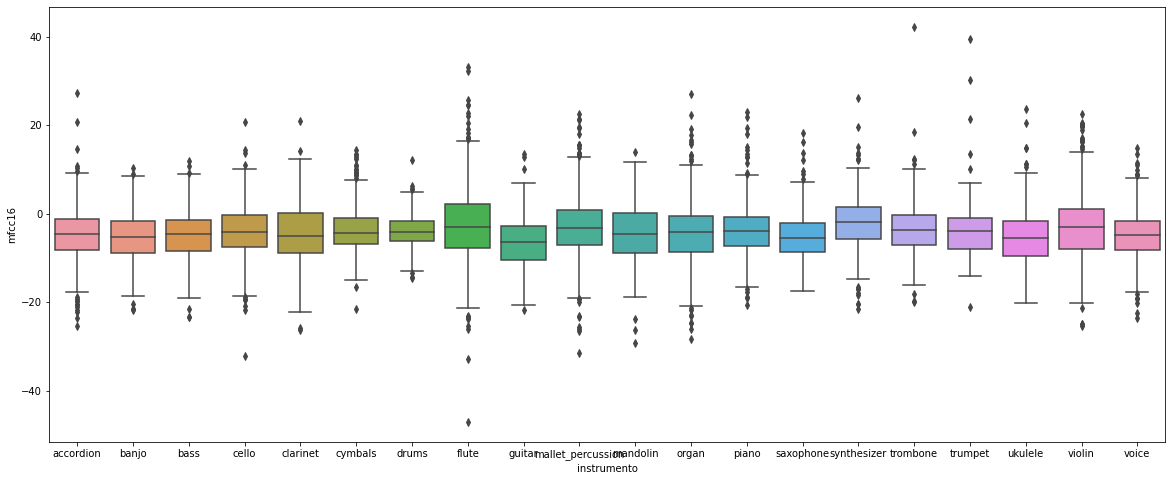

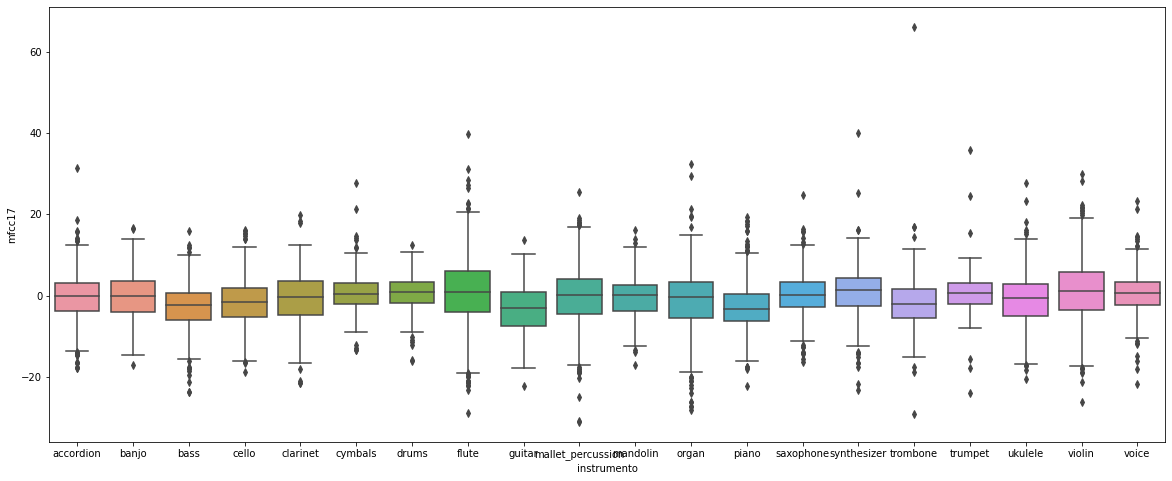

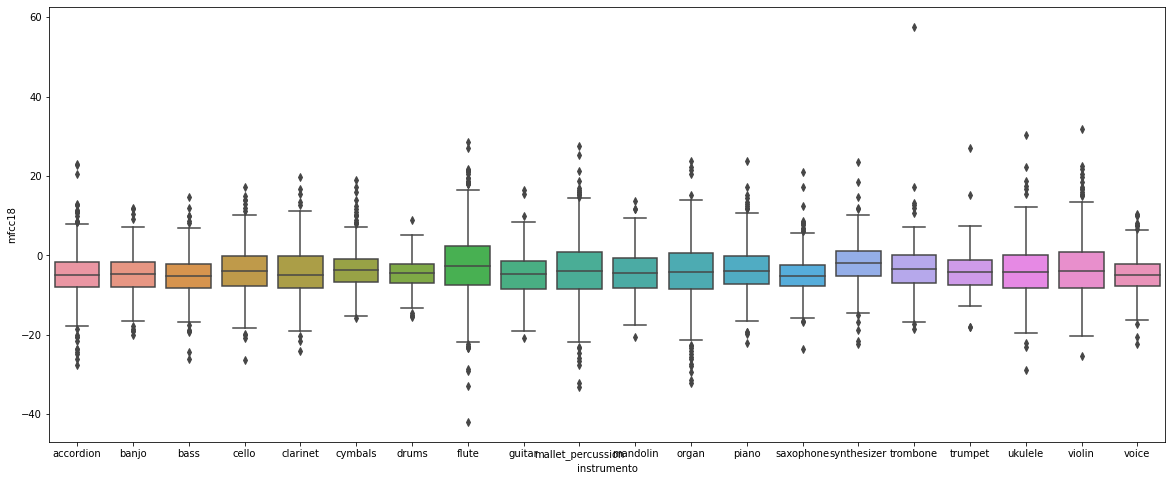

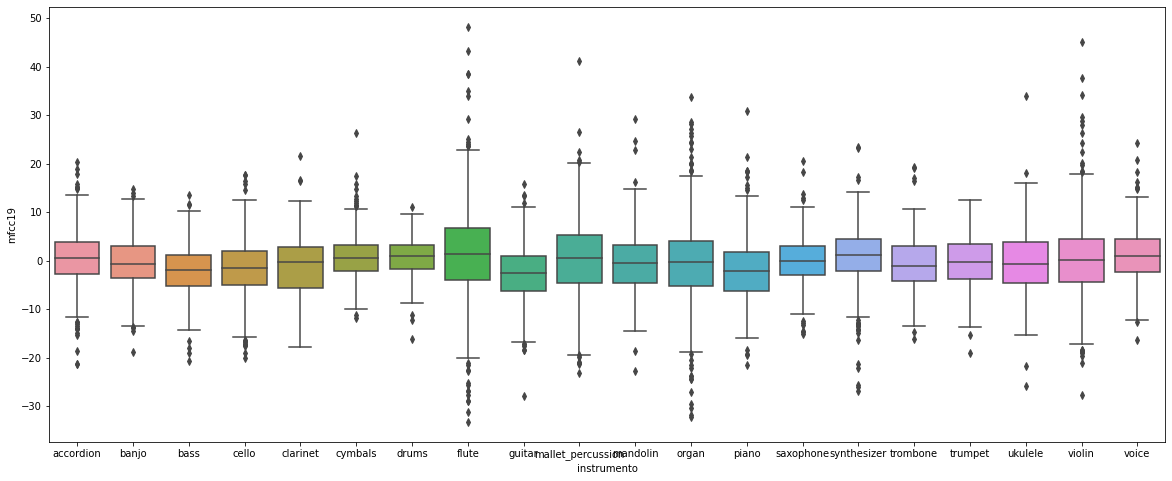

In [14]:
for i in range(20):    
    plt.figure(figsize=( 20, 8 ))
    ax = sns.boxplot(x="instrumento", y=f'mfcc{i}', data=df_instrumentos)
    plt.show()

- Spectral band

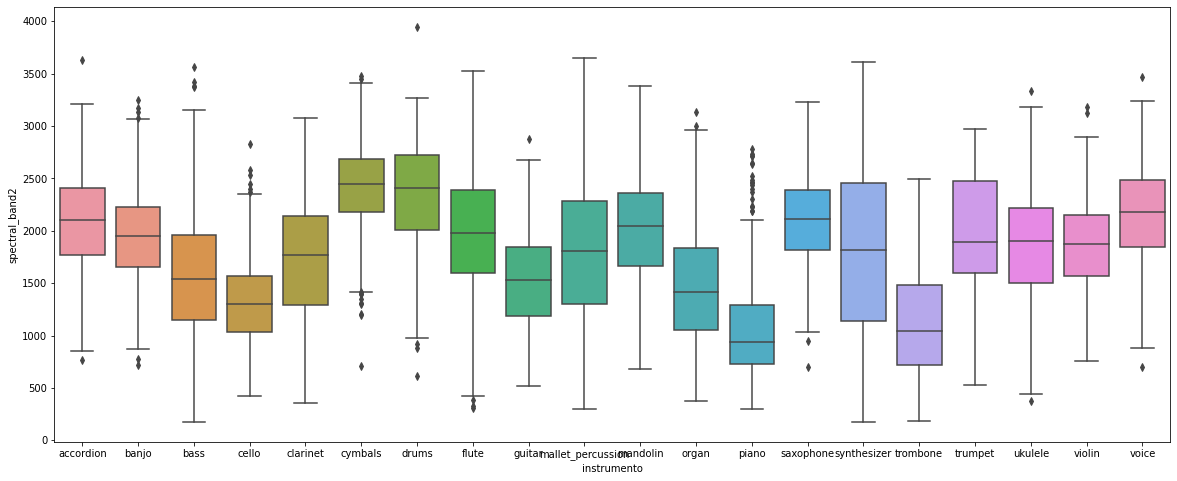

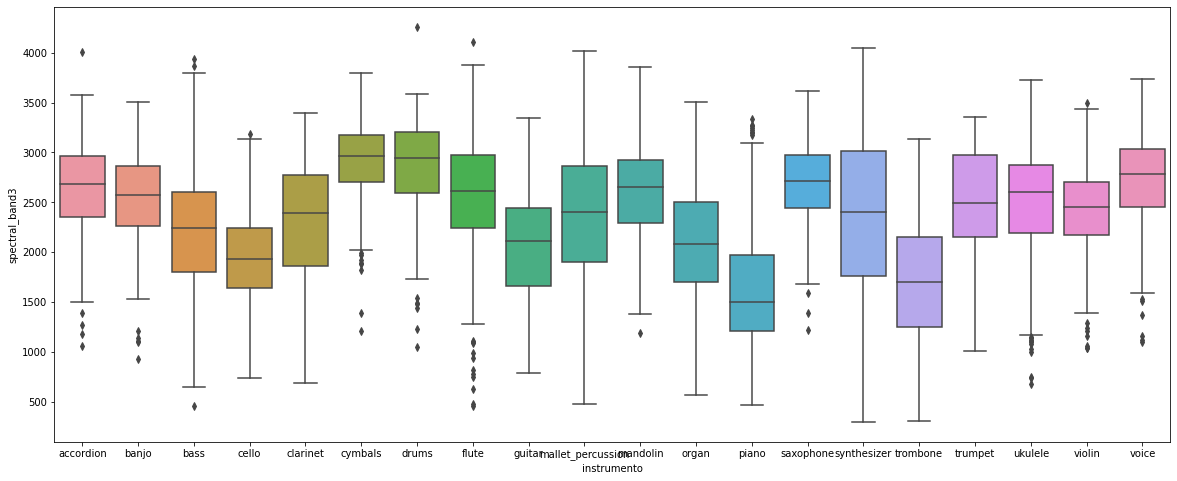

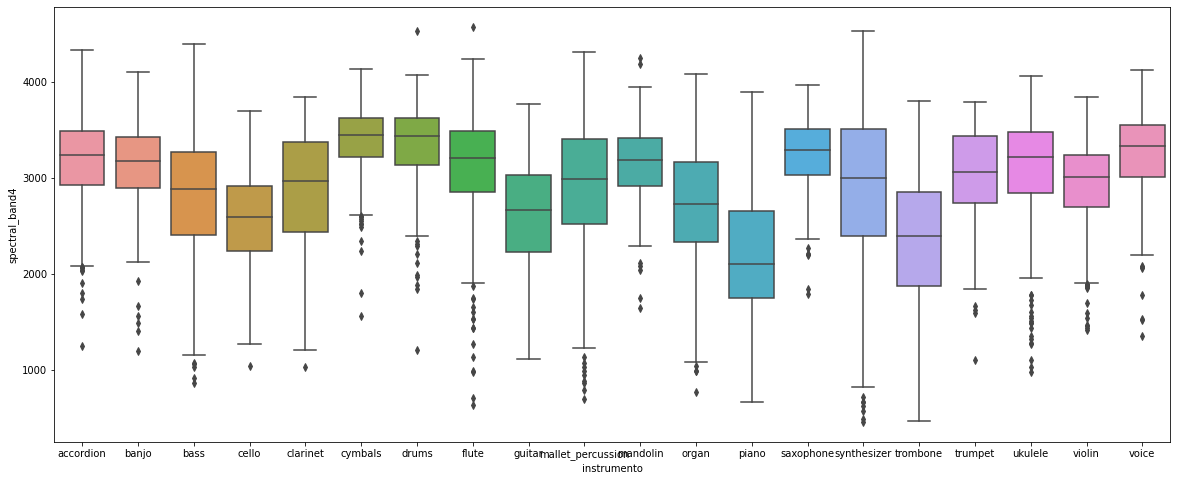

In [15]:
for i in range(2, 5):    
    plt.figure(figsize=( 20, 8 ))
    ax = sns.boxplot(x="instrumento", y=f'spectral_band{i}', data=df_instrumentos)
    plt.show()

- Chroma

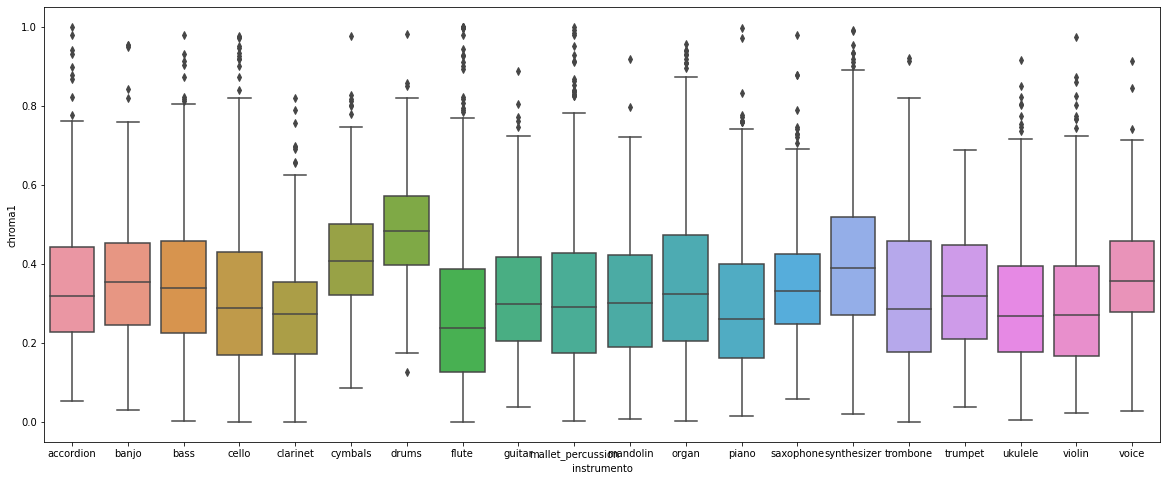

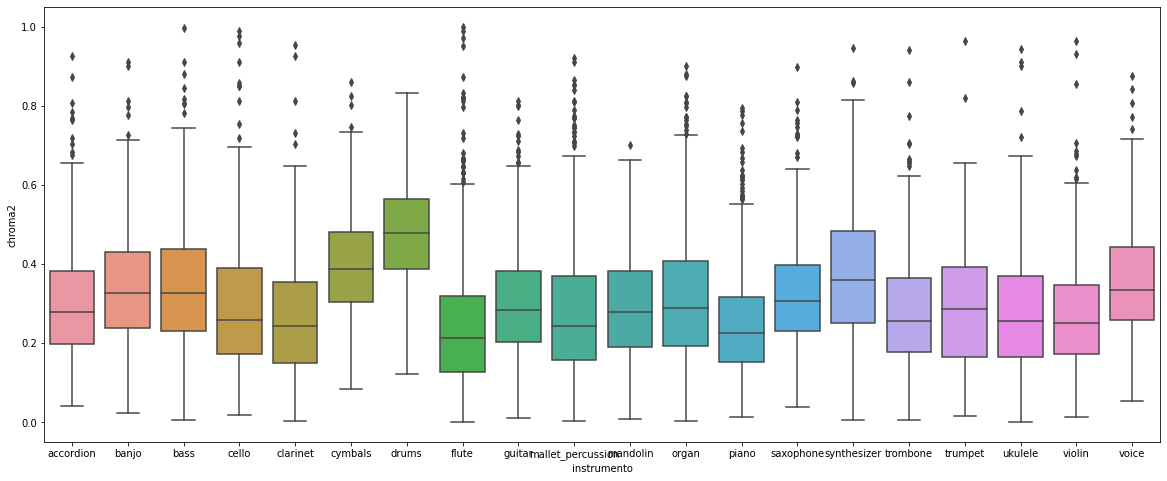

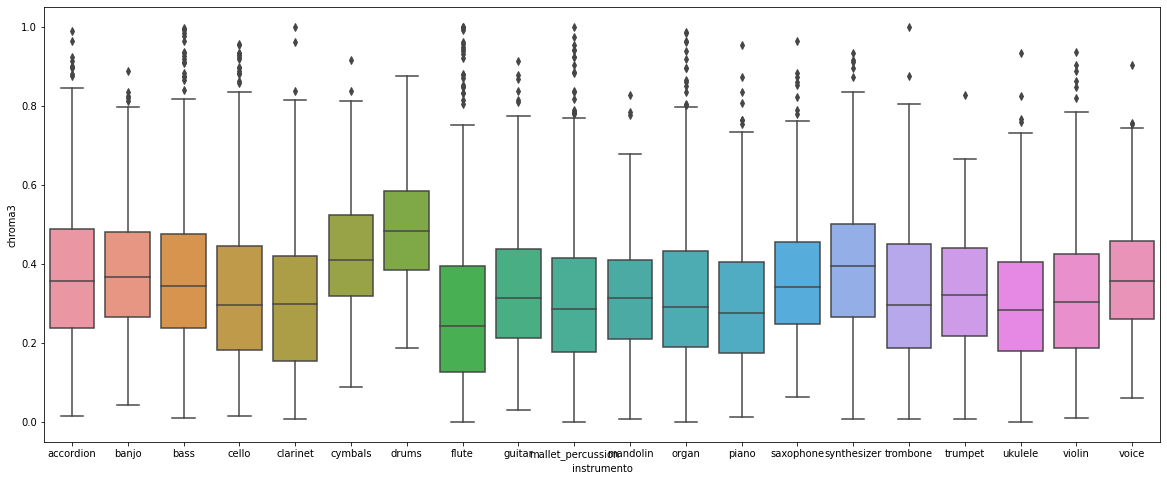

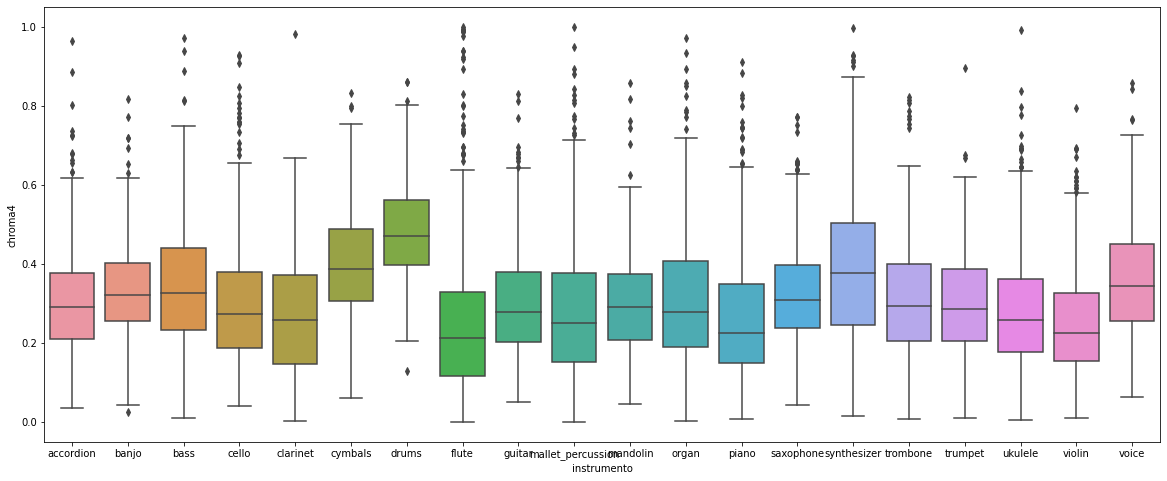

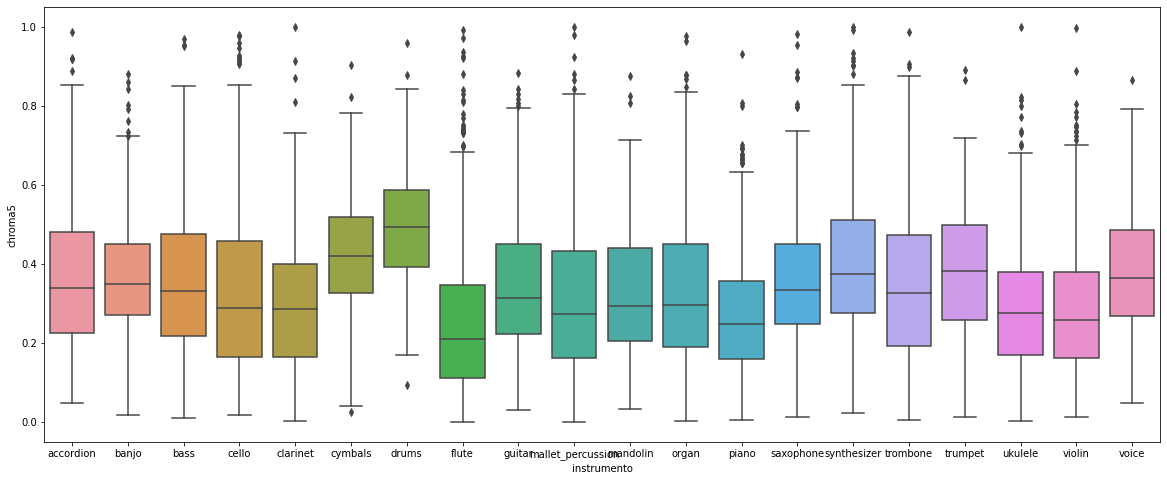

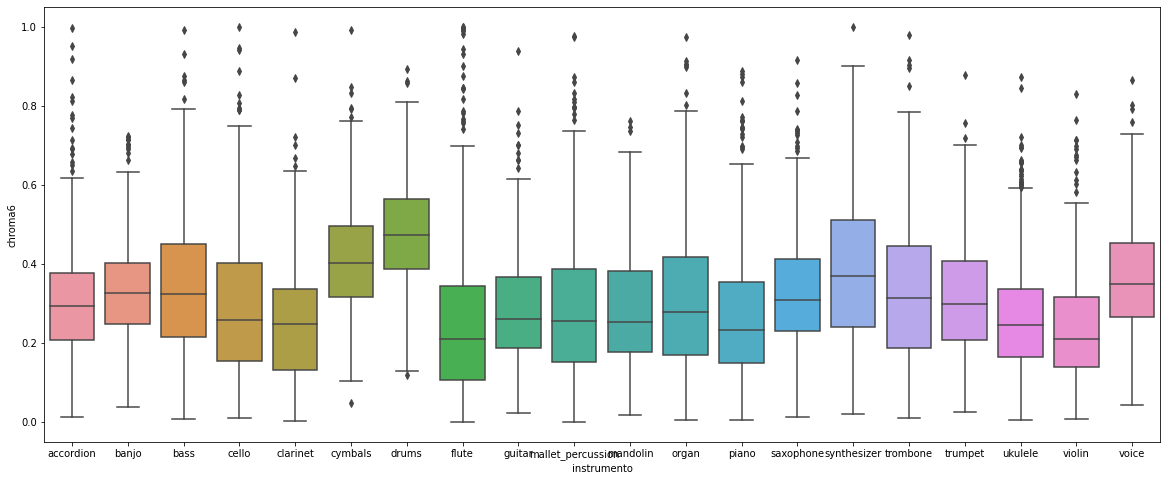

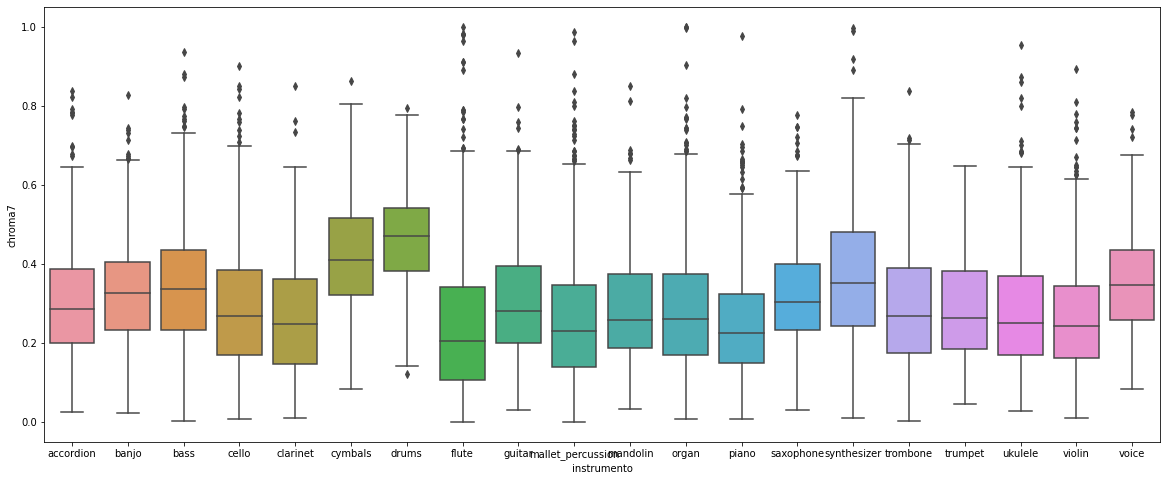

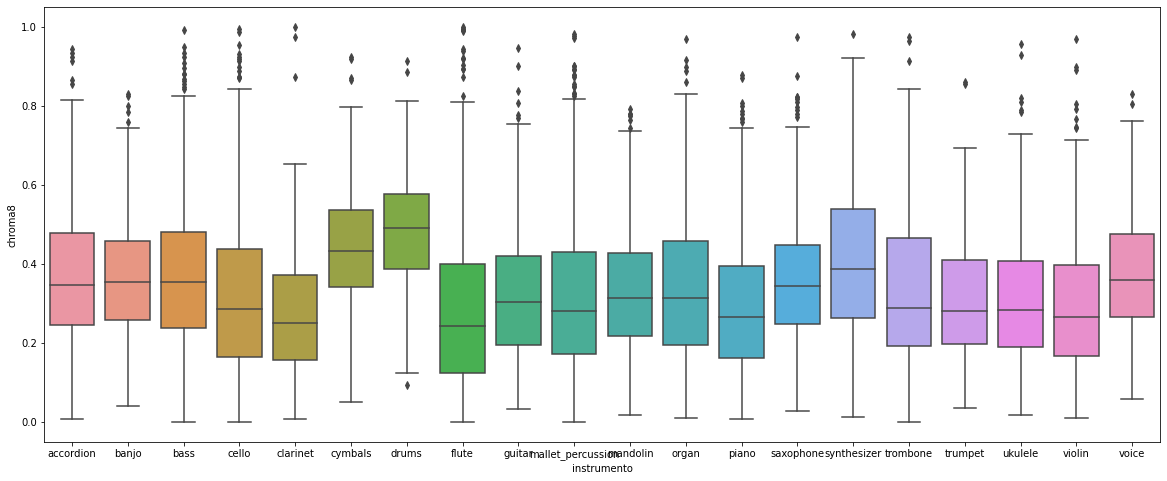

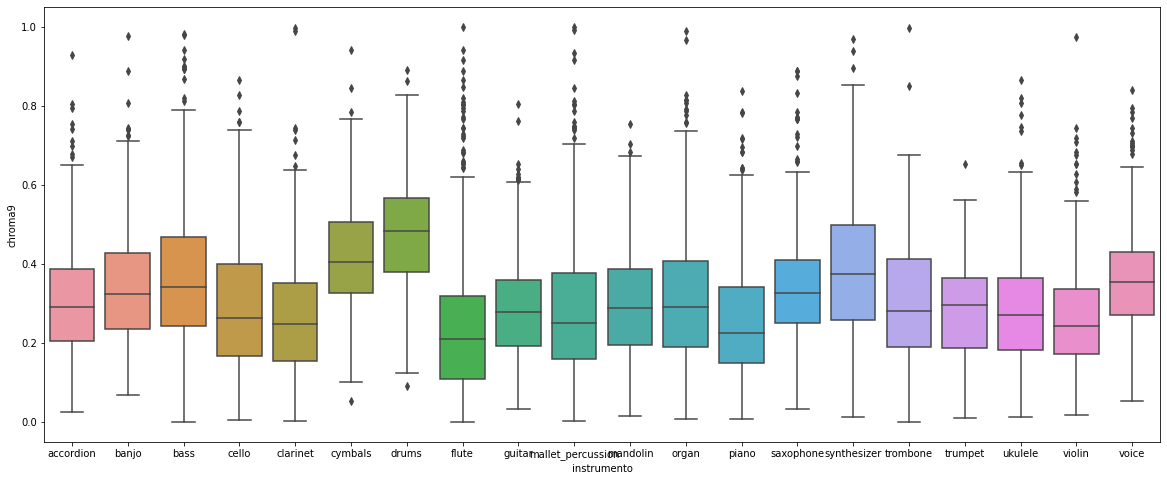

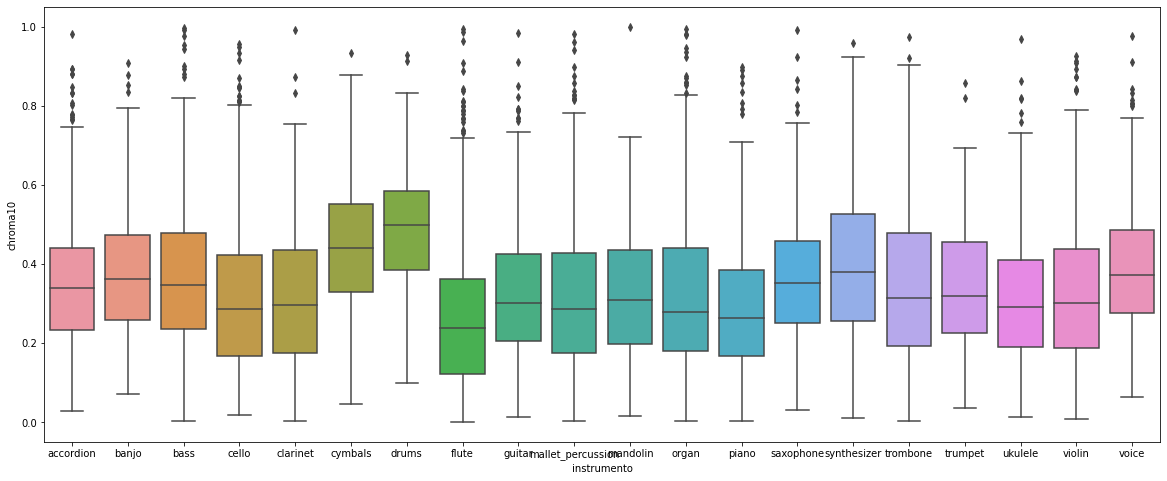

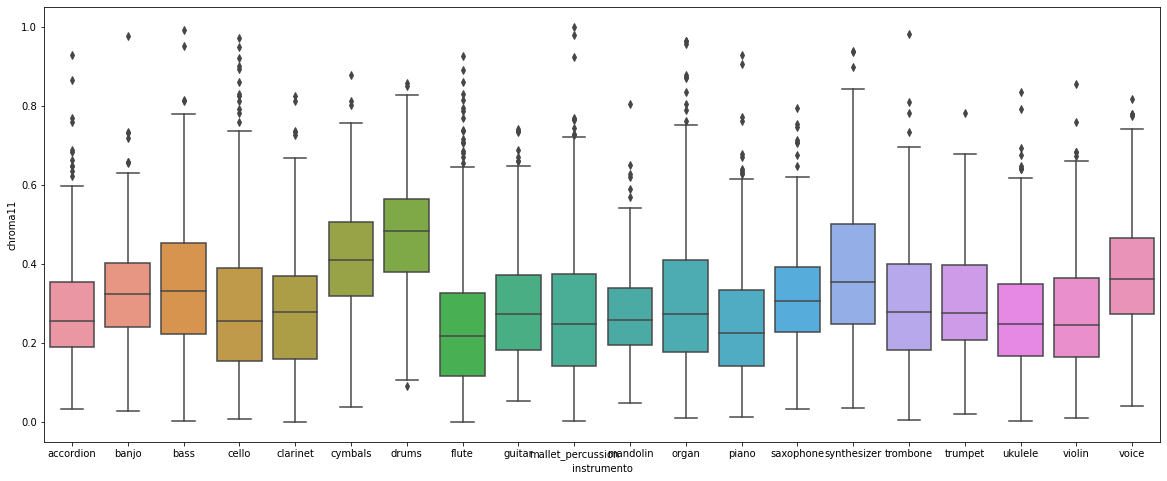

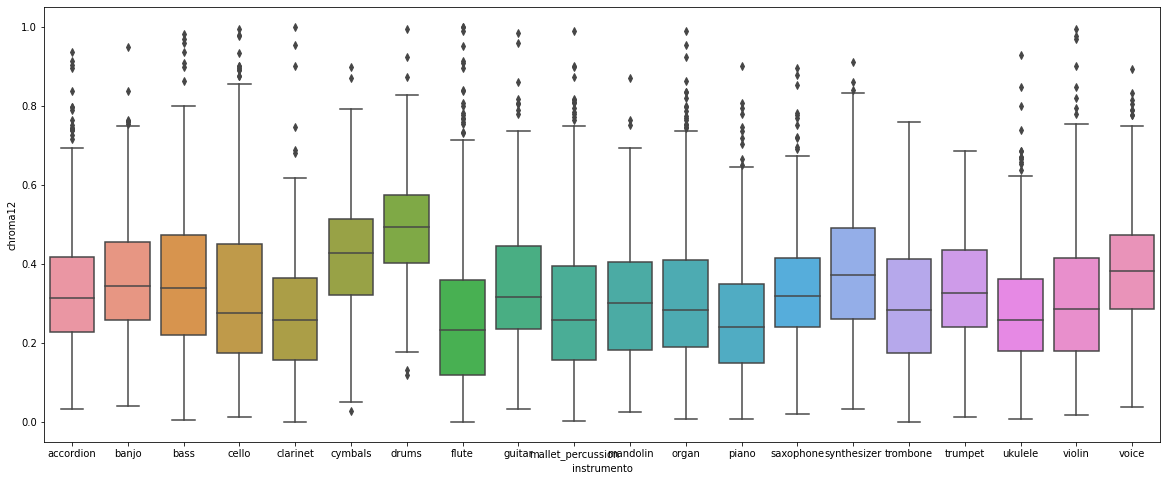

In [16]:
for i in range(1, 13):
    plt.figure(figsize=( 20, 8 ))
    ax = sns.boxplot(x="instrumento", y=f'chroma{i}', data=df_instrumentos)
    plt.show()

- Outras Features

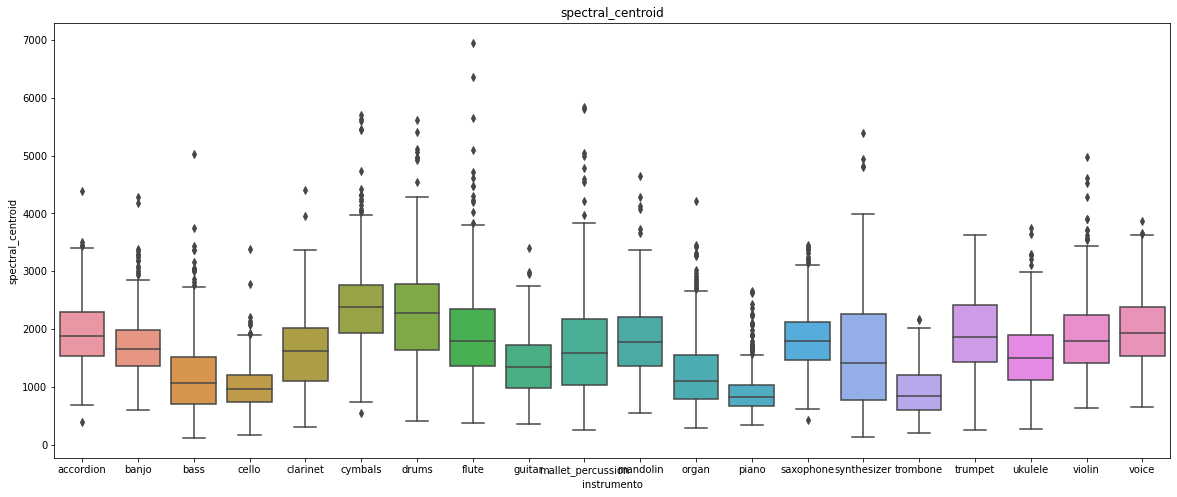

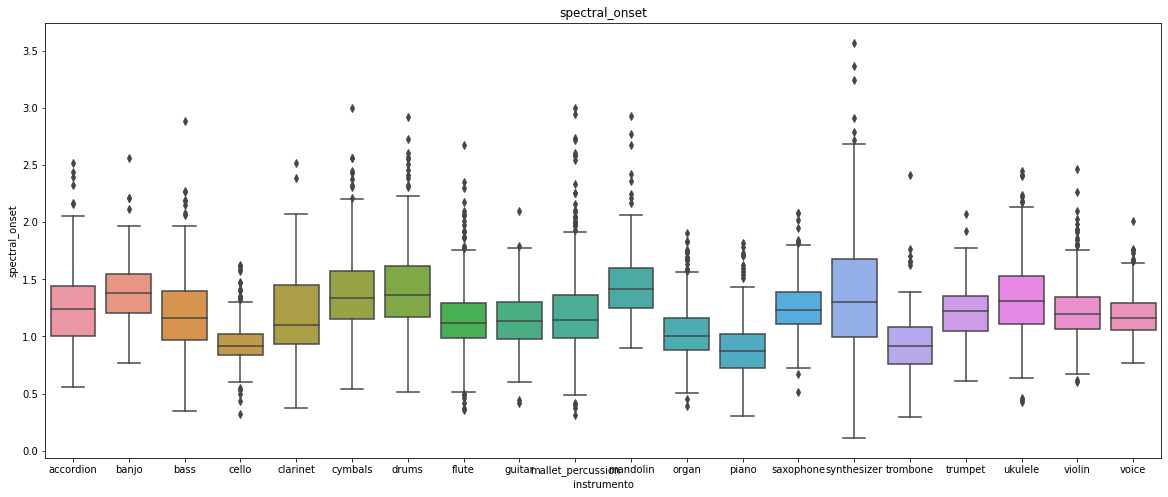

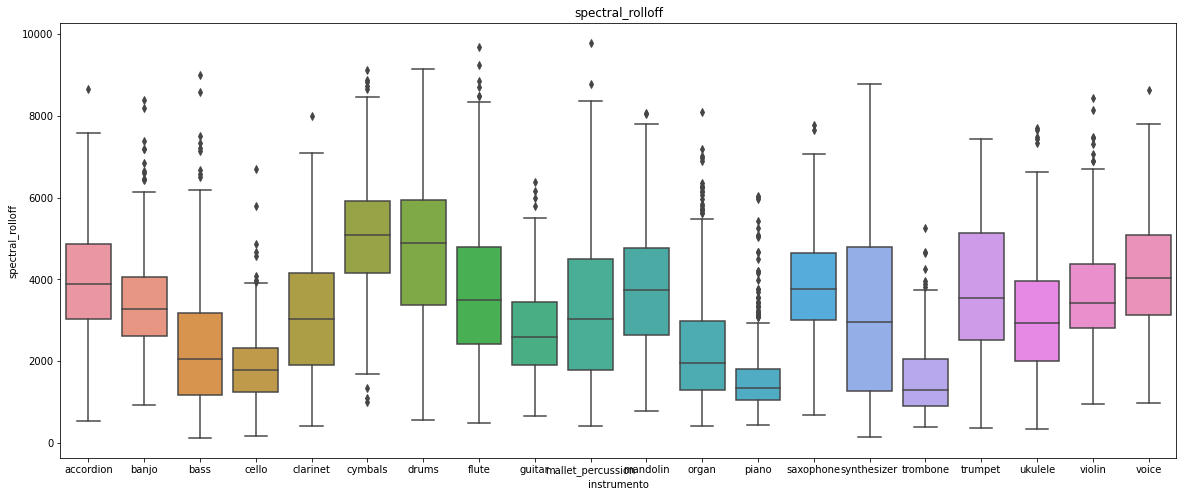

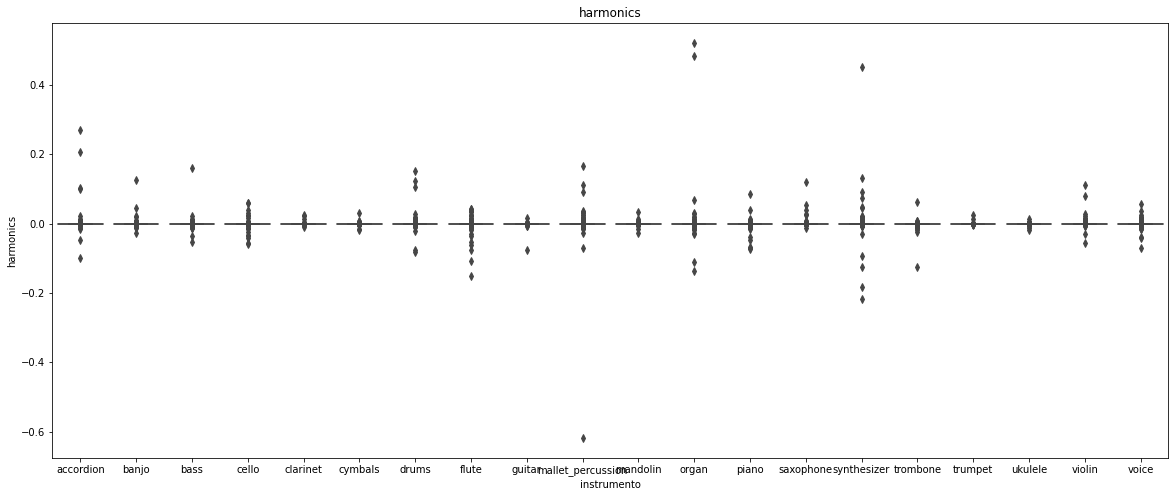

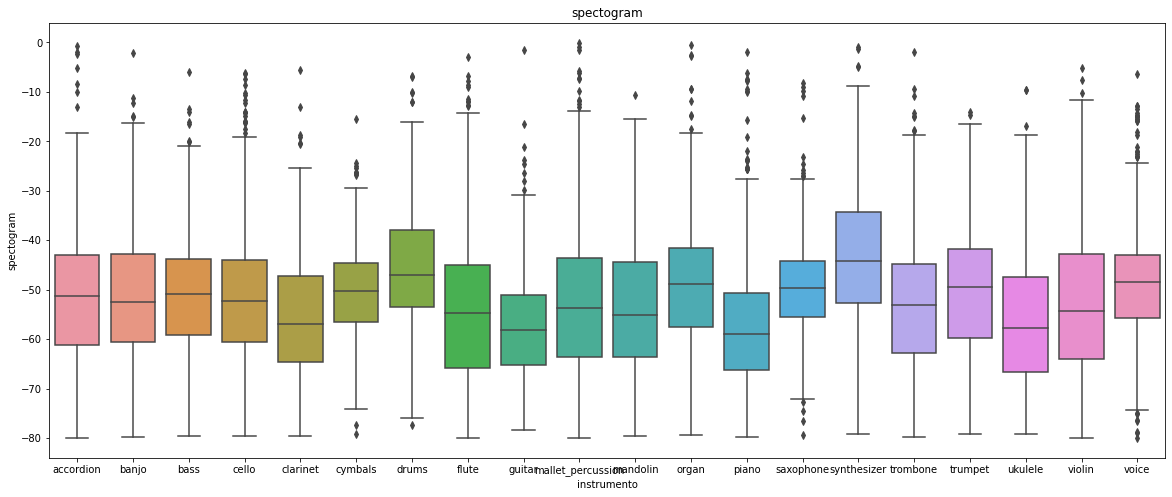

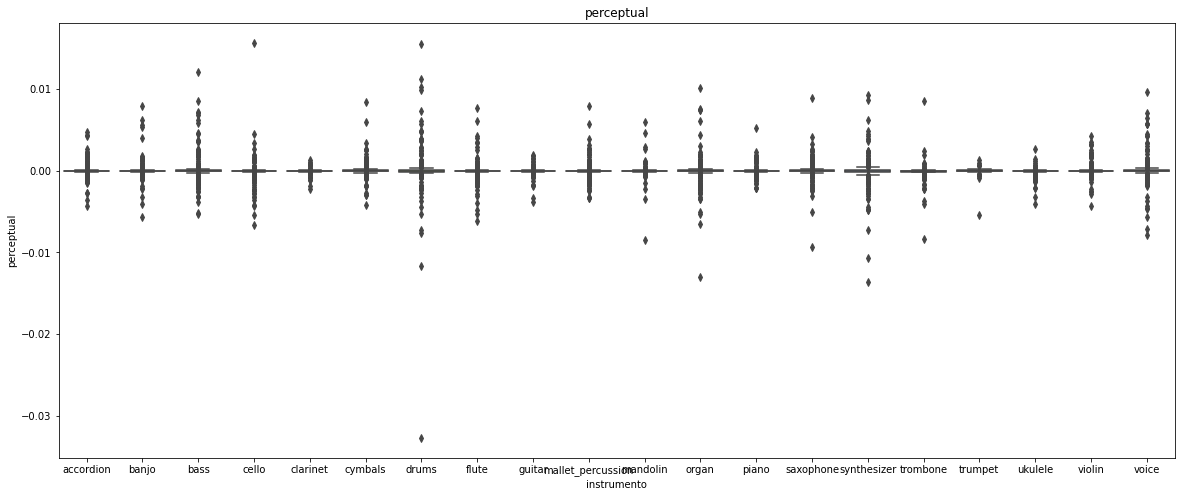

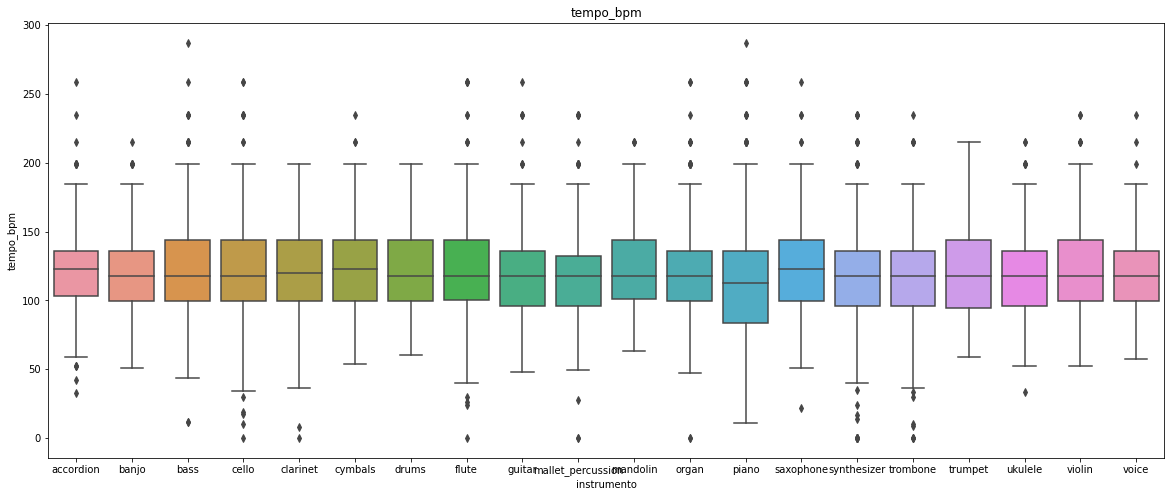

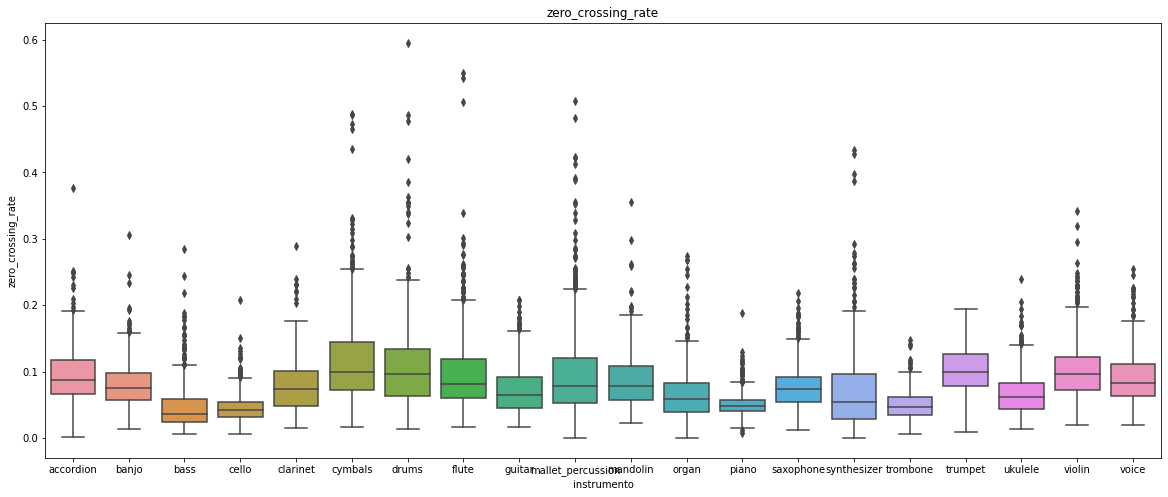

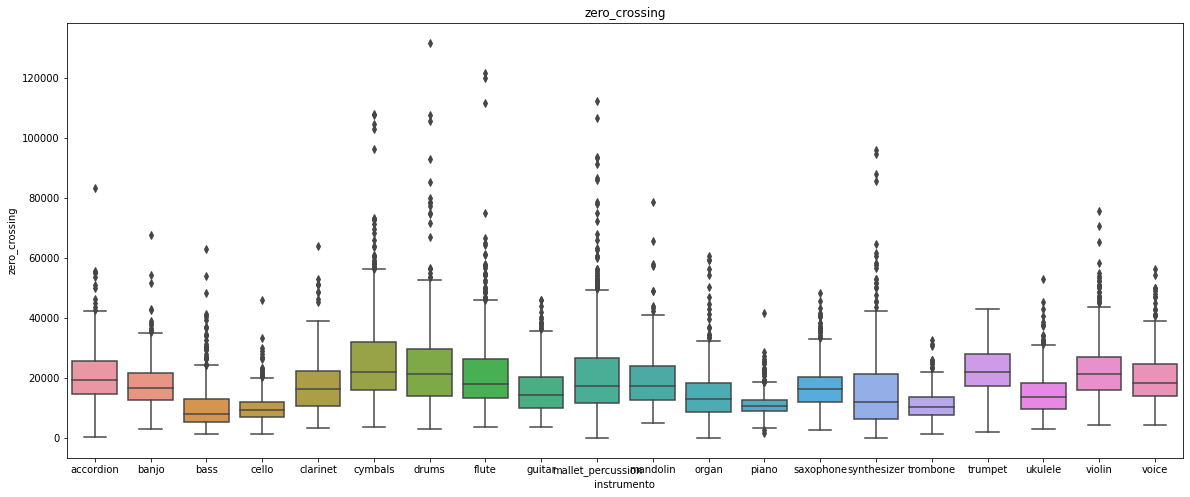

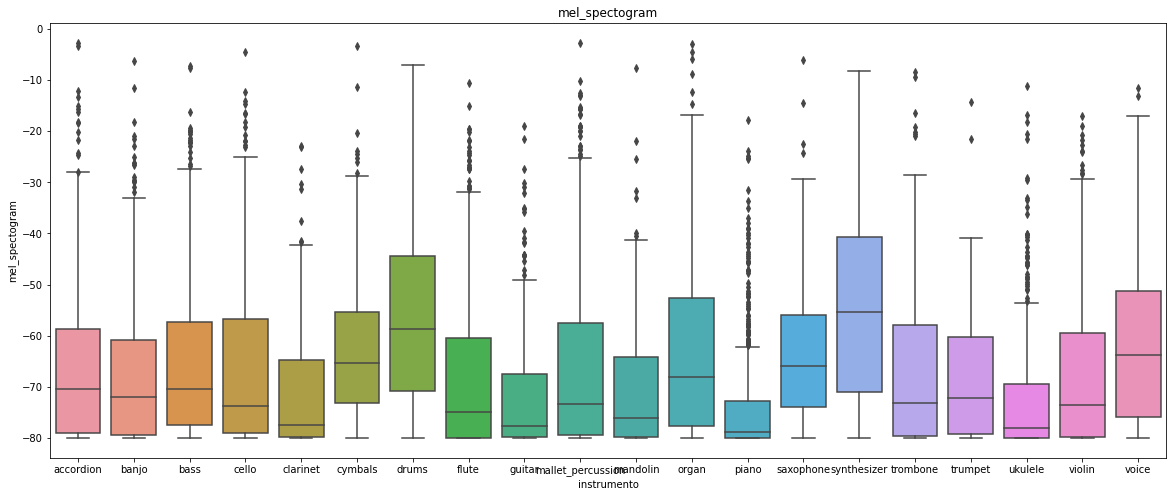

In [17]:
other_features = ['spectral_centroid', 'spectral_onset', 'spectral_rolloff', 
                  'harmonics','spectogram','perceptual', 'tempo_bpm', 
                  'zero_crossing_rate', 'zero_crossing','mel_spectogram']

for feature in other_features:    
    plt.figure(figsize=( 20, 8 ))
    ax = sns.boxplot(x="instrumento", y=feature, data=df_instrumentos)
    plt.title(feature)
    plt.show()

- Distribuição Estatistica dos dados

Note: The number of non binary numerical features is very large (51), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


<AxesSubplot:xlabel='spectral_rolloff', ylabel='Density'>

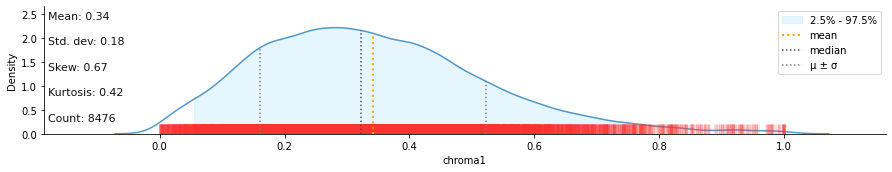

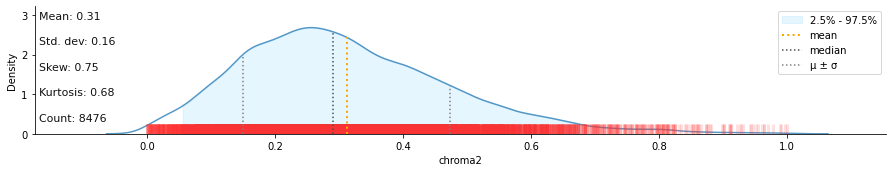

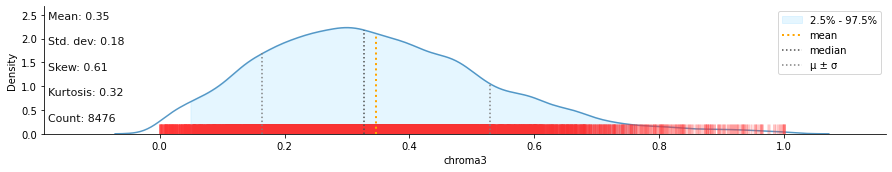

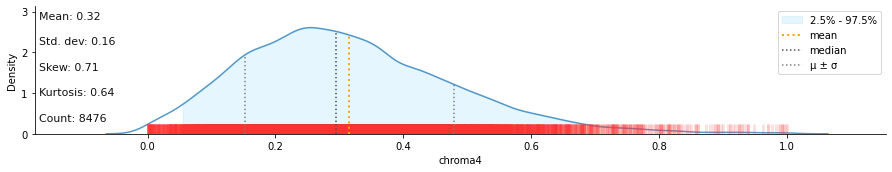

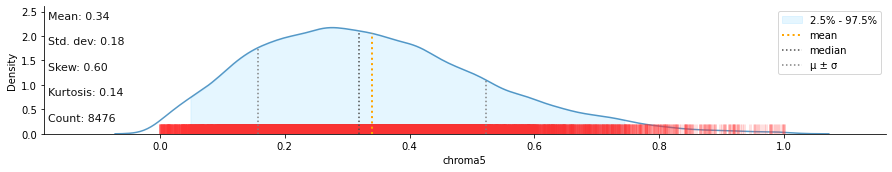

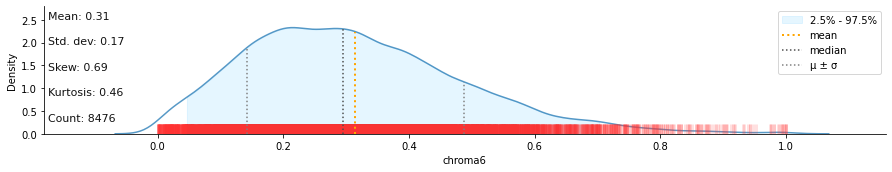

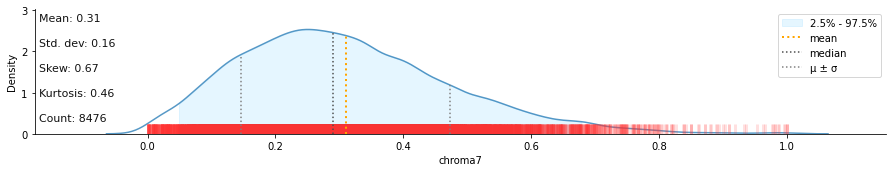

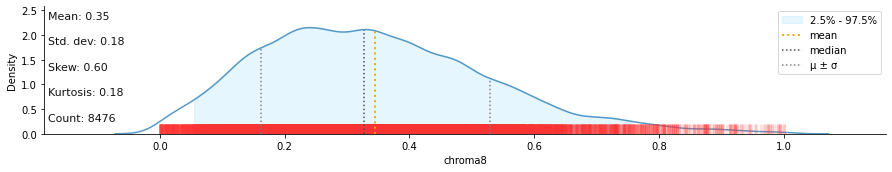

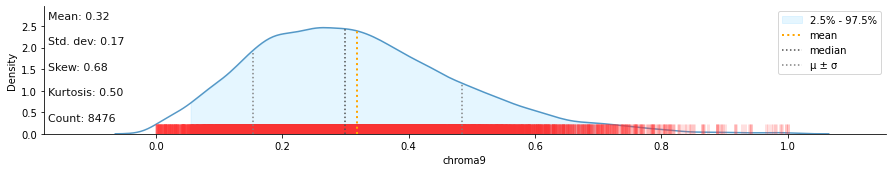

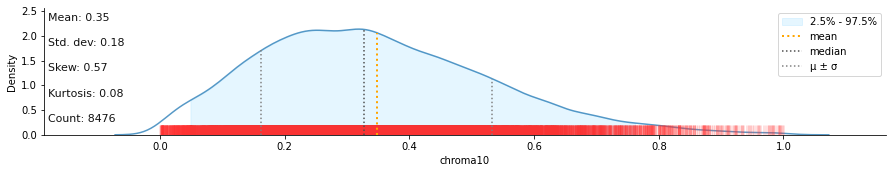

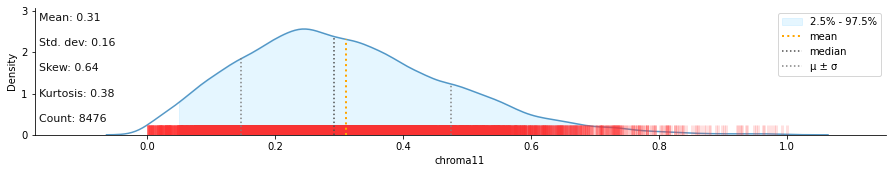

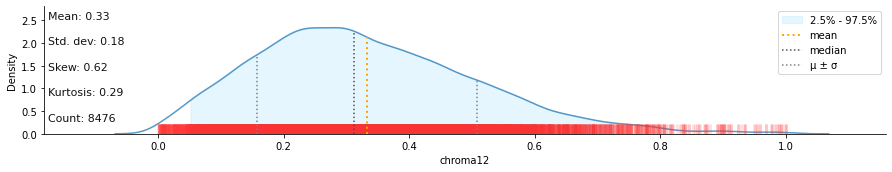

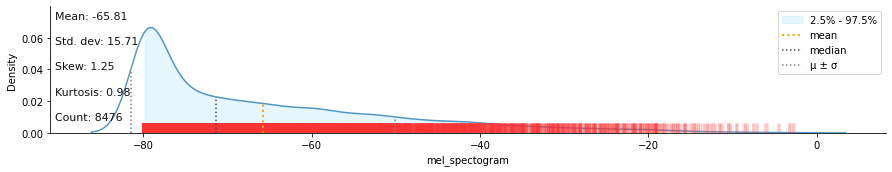

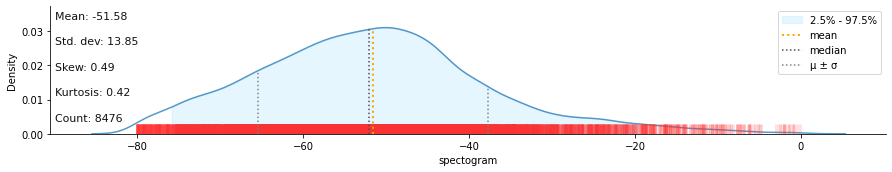

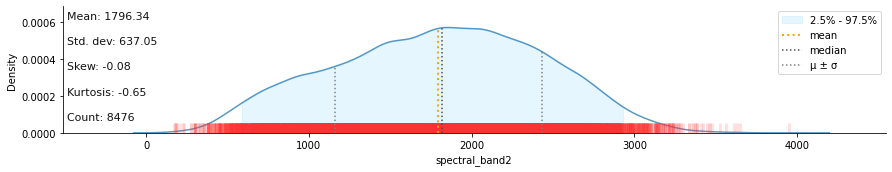

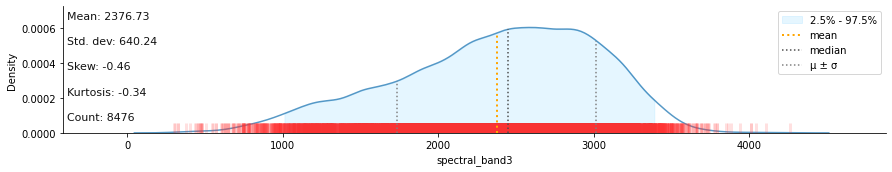

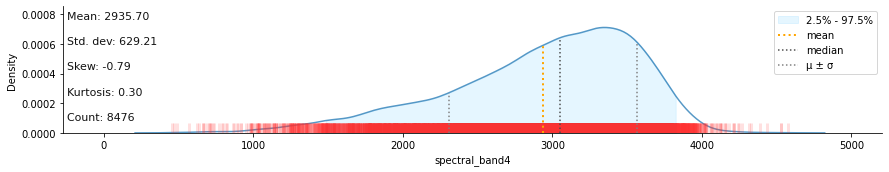

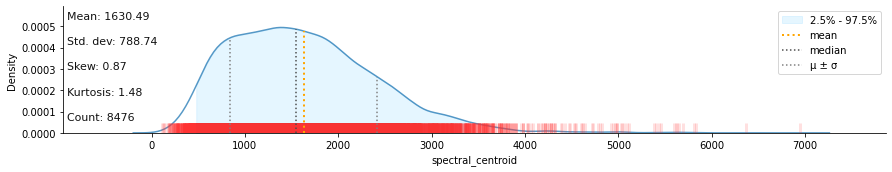

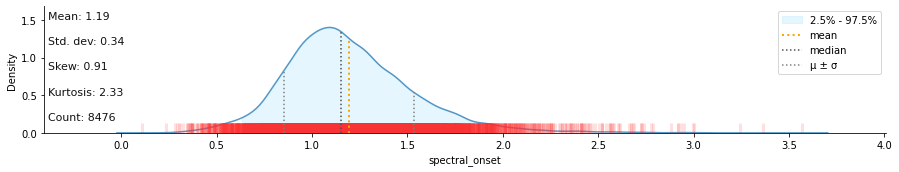

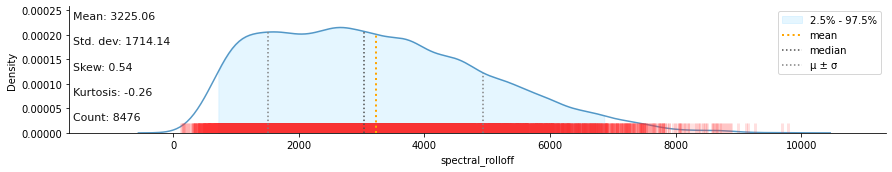

In [18]:
kb.dist_plot(df_instrumentos)

- Features Selecionadas

In [19]:
df_instrumentos.columns

Index(['instrumento', 'file_name', 'chroma1', 'chroma2', 'chroma3', 'chroma4',
       'chroma5', 'chroma6', 'chroma7', 'chroma8', 'chroma9', 'chroma10',
       'chroma11', 'chroma12', 'mel_spectogram', 'spectogram',
       'spectral_band2', 'spectral_band3', 'spectral_band4',
       'spectral_centroid', 'spectral_onset', 'spectral_rolloff', 'harmonics',
       'perceptual', 'tempo_bpm', 'zero_crossing_rate', 'zero_crossing',
       'tonnetz0', 'tonnetz1', 'tonnetz2', 'tonnetz3', 'tonnetz4', 'tonnetz5',
       'mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7',
       'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14',
       'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19'],
      dtype='object')

In [36]:
features = ['tonnetz0', 'tonnetz1', 'chroma1', 'chroma2',  'chroma3', 'chroma4', 'chroma5','chroma6','chroma7', 
            'mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7','mfcc8', 'mfcc9', 'mfcc10', 
            'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14','mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
            'chroma8','chroma9','chroma10', 'chroma11', 'chroma12', 'spectral_band2',
            'spectral_band3','spectral_band4','spectral_centroid', 'spectral_onset', 'spectral_rolloff', 
            'spectogram', 'mel_spectogram','zero_crossing_rate', 'zero_crossing','instrumento', 'file_name']

- novo dataframe para treinamento com features selecionadas

In [37]:
df_train = df_instrumentos[features]
df_train.shape

(8476, 46)

In [38]:
wp.save_data('df_instrumentos_features_selecionadas', df_train)

- Pesquisando uma musica na base

In [23]:
df_train[df_train['file_name'] == '153986_203520.ogg']

tonnetz0  tonnetz1   chroma1   chroma2   chroma4   chroma5   chroma6  \
8474  0.108185  0.025366  0.615495  0.541314  0.611199  0.791296  0.678383   

       chroma7   chroma8   chroma9  ...  spectral_band4  spectral_centroid  \
8474  0.508162  0.543337  0.463837  ...     3376.494191        1428.726581   

      spectral_onset  spectral_rolloff  spectogram  mel_spectogram  \
8474        1.081204       3358.205447  -30.260586      -13.068514   

      zero_crossing_rate  zero_crossing  instrumento          file_name  
8474            0.032283           7136        voice  153986_203520.ogg  

[1 rows x 26 columns]

# Scatter Plot

<AxesSubplot:xlabel='zero_crossing_rate', ylabel='spectral_rolloff'>

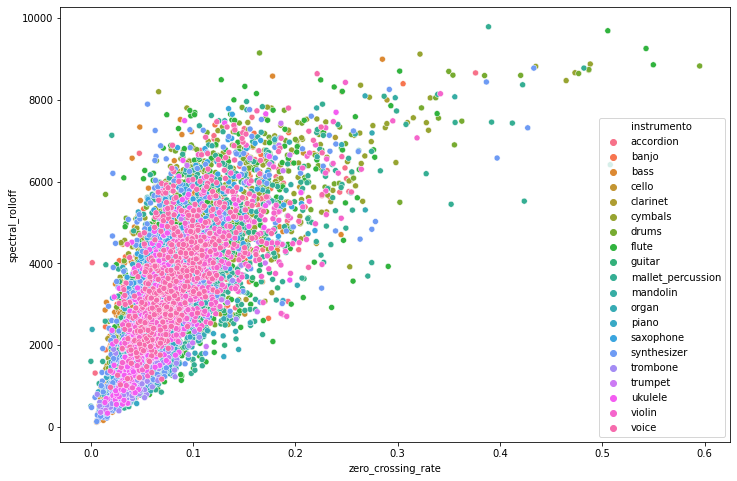

In [24]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x = 'zero_crossing_rate', y = 'spectral_rolloff', hue = 'instrumento', data = df_train)

<AxesSubplot:xlabel='mel_spectogram', ylabel='spectral_band2'>

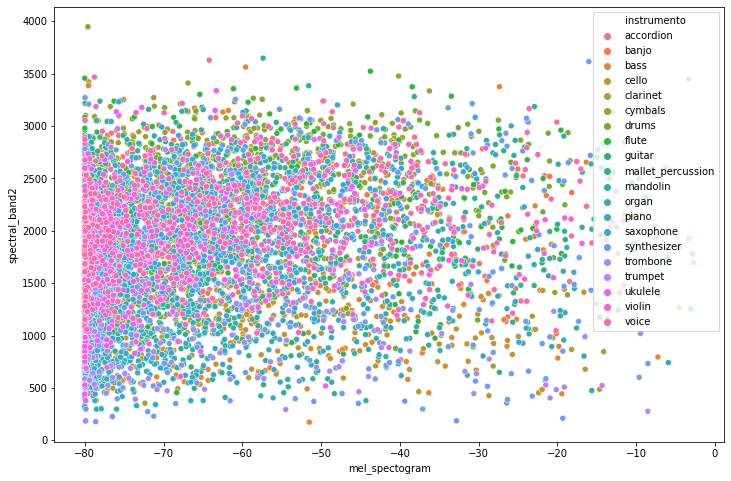

In [25]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x = 'mel_spectogram', y = 'spectral_band2', hue = 'instrumento', data = df_train)

# Correlação

- Positiva

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

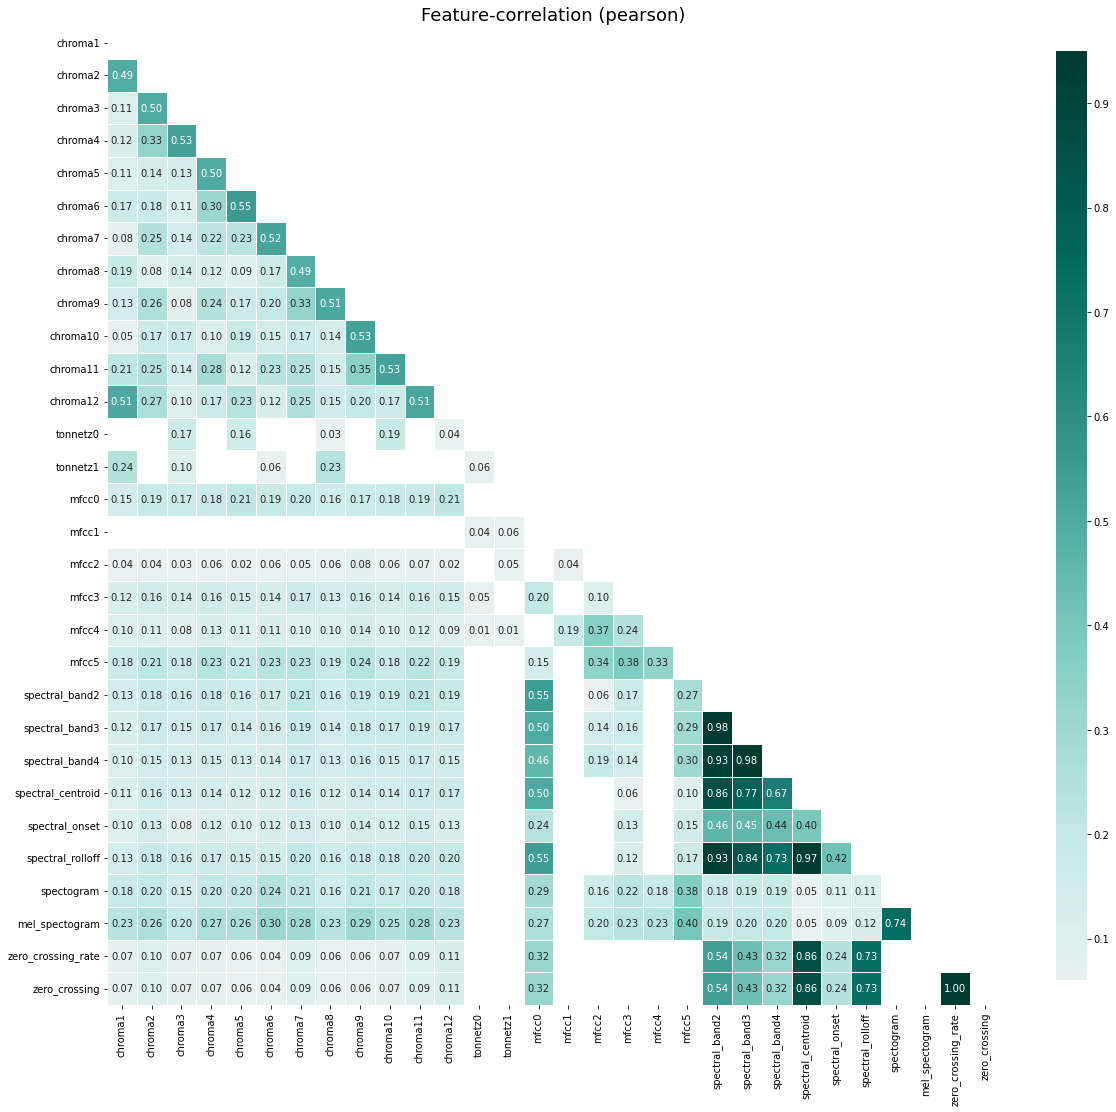

In [ ]:
kb.corr_plot(df_train, split='pos', figsize=(20,18))


- Negativa

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

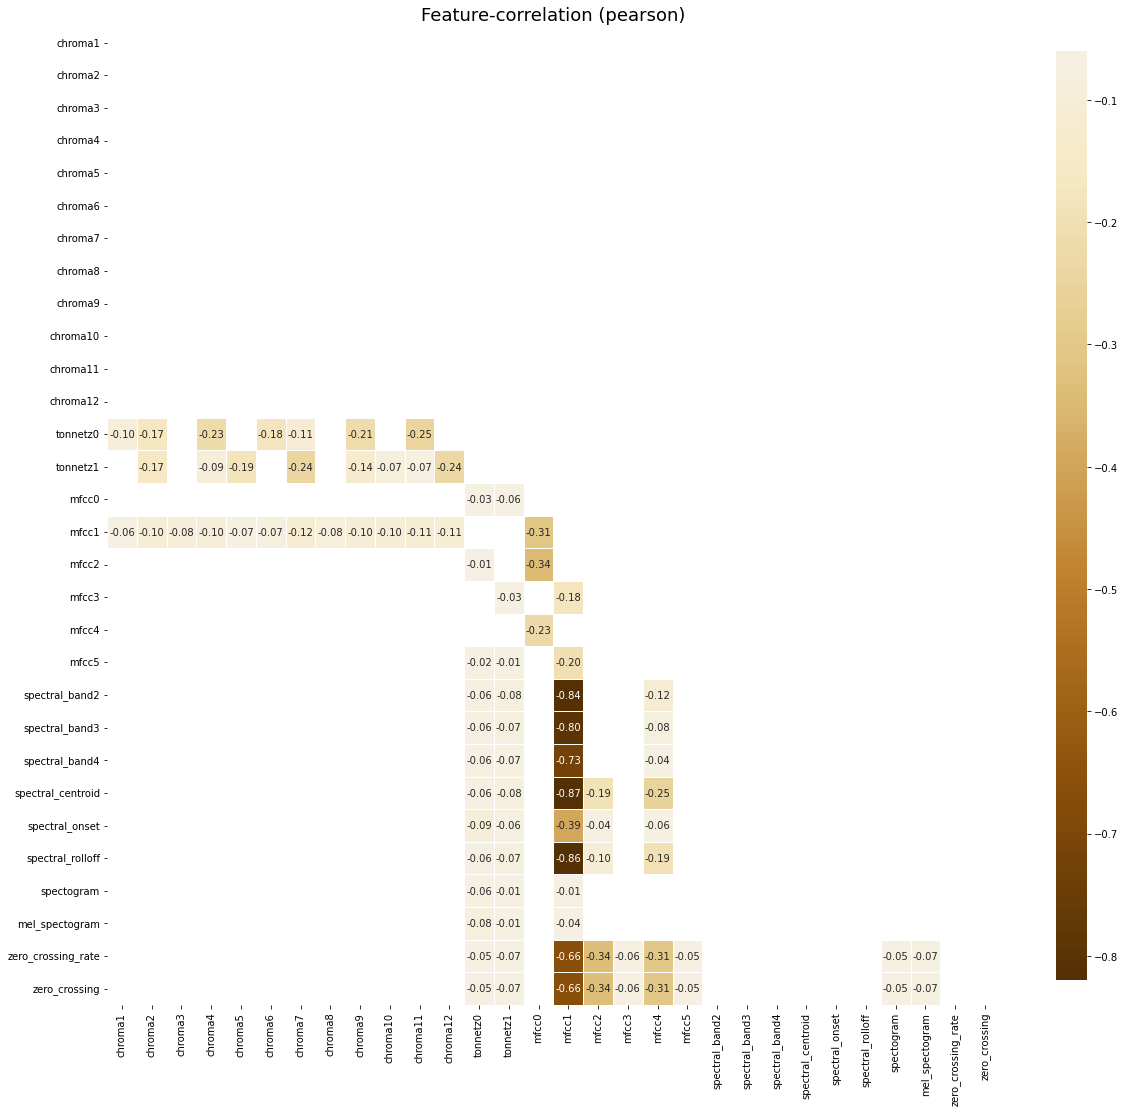

In [ ]:
kb.corr_plot(df_train, split='neg', figsize=(20,18))
